# **"Decoding Taste: Sentiment Analysis of Recipe Reviews"**


---



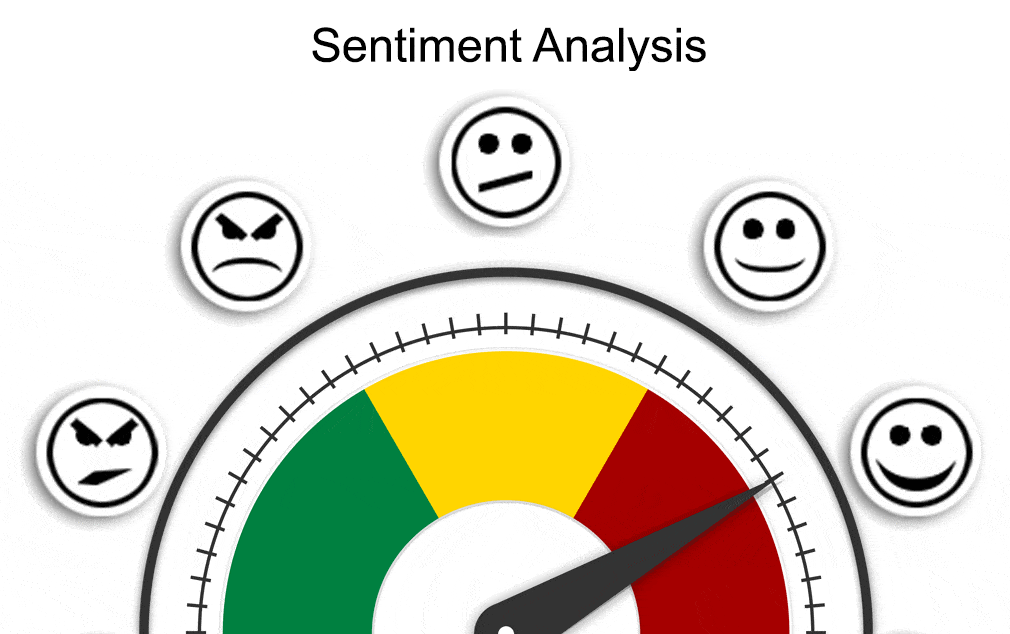

# **Name           : Sidarsha M**

# **Organization: Entri Elevate**

# **Date             :**


---




# **1.OVERVIEW OF PROBLEM STATEMENT:**

---



 **1.1 PROBLEM SCOPING**

---





NLP project aims to leverage natural language processing (NLP) techniques to gain insights from a vast dataset of recipe reviews and user feedback. The project's primary goal is to analyze the sentiment, trends, and patterns in user interactions with recipes, providing actionable insights that can be used by recipe developers, culinary brands, and platforms to enhance user experience and recipe recommendations.

Key aspects of this project include:

**Sentiment Analysis**: Using NLP models to determine the sentiment behind each review (positive, negative, or neutral) based on the text content and user ratings. This helps understand how users feel about a recipe and what improvements might be necessary

---



**1.2 The 4Ws (Who, What, When, and Why)**
 1. Who
Target Audience:Consumers,Chefs/Cookbook Authors,Food Bloggers and Websites,Businesses

  Stakeholders:Developers/Analysts/data scientists

 2.What

 Problem: Sentiment analysis of recipe reviews, aiming to classify the overall sentiment of reviews (positive, negative, or neutral).

 Inputs: Textual data from recipe reviews

 Outputs:
A model that predicts the sentiment of a recipe review.
Analyzing sentiments on specific recipes, ingredients, or cooking methods.

  Tools/Techniques: NLP, machine learning, and sentiment analysis techniques like TF-IDF.
 3.When

Project Timeline: 4 weeks
Data Collection:1 week
Data Preprocessing & Cleaning: 1 week.
Model Training and Evaluation:2 weeks
Deployment (optional):
4. Why

Purpose of the Project:
Customer Insights: Gain insights into customer preferences, opinions, and feedback to improve recipe offerings.


---





#**2.OBJECTIVE**
To develop an optimal sentiment prediction model by analyzing recipe text reviews and user star ratings using machine learning and NLP techniques.


---




#**3.	DATA DESCRIPTION:**

**3.1.	Source:**
UCI Machine Learning Repository

http://archive.ics.uci.edu/dataset/911/recipe+reviews+and+user+feedback+dataset

**3.2.	Features:**
1. recipe name: {name of the recipe the comment was posted on}
2. recipe number: {placement of the recipe on the top 100 recipes list}
3. recipe code: {unique id of the recipe used by the site}
4. comment id: {unique id of the comment}
5. user id: {unique id of the user who left the comment}
6. user name: {name of the user}
7. user reputation: {internal score of the site, roughly quantifying the past behavior of the user}
8. create at: {time at which the comment was posted as a Unix timestamp}
9. reply count: {number of replies to the comment}
10. thumbs up: {number of up-votes the comment has received}
11. thumbs down: {number of down-votes the comment has received}
12. stars: {the score on a 1 to 5 scale that the user gave to the recipe. A score of 0 means that no score was given}
13. best score: {score of the comment, likely used by the site the help determine the order in the comments that appear in}
14. text: {the text content of the comment}
15. num_records: {the number of records}


---




# **4.DATA COLLECTION**

**STEP 4.1:Importing Libraries**

In [ ]:
#***********Preprocessing*************************************************************************************************************************************************
import pandas as pd                                                               #pandas->Python Data Analysis
import numpy as np                                                                #python numeric operation
import matplotlib.pyplot as plt                                                   #plotting of graphs and visualizations
import seaborn as sns                                                             #statistical data visualizations with a more aesthetic and informative style
from sklearn import preprocessing                                                 # Lprovides tools for scaling, normalizing, and encoding data.
from scipy.stats import skew                                                      #skew()-used to measure the asymmetry of a data distribution
from scipy.stats import kurtosis                                                  # measures the tailedness (peakedness) of a data distribution.
#***************NLP********************************************************************************************************************************************************

!python -m pip install nltk==3.9.1                                                #Installs NLTK version 3.9.1.
import nltk                                                                       #natural language toolkit
nltk.download('punkt')                                                            #Downloads tokenization resources.
from nltk.tokenize import word_tokenize                                           #Imports word tokenizer.
import string                                                                     #Provides string manipulation utilities.
import re                                                                         #Supports regular expressions
from nltk.corpus import stopwords                                                 #Imports stopwords corpus
nltk.download('stopwords')                                                        #Downloads stopwords dataset.
from nltk.stem import PorterStemmer                                               #Imports stemming algorithm
from scipy.stats import mode                                                      #Imports mode function for finding the most common value
nltk.download('vader_lexicon')                                                    #Downloads lexicon for sentiment analysis.
from nltk.sentiment import SentimentIntensityAnalyzer                             #Imports sentiment analysis tool
from sklearn.feature_extraction.text import CountVectorizer                       #Converts text into a count-based feature matrix.
from sklearn.feature_extraction.text import TfidfVectorizer                       #Converts text into TF-IDF features.
from wordcloud import WordCloud                                                   #Generates word cloud visualizations
import joblib                                                                     #Saves and loads machine learning models

#*************************************************************************************************************************************************************************

from scipy import stats                                                           #Imports statistical functions from SciPy
from scipy.stats import zscore                                                    # Computes the z-score for standardization
from sklearn.model_selection import train_test_split                              #Splits data into training and testing sets.
from sklearn.preprocessing import StandardScaler                                  #Scales features to standard normal distribution.
from sklearn.linear_model import LogisticRegression                               #Imports logistic regression model.
from sklearn.metrics import accuracy_score, classification_report                 #Evaluates model performance.
import warnings                                                                   # Handles warnings in Python.
warnings.filterwarnings('ignore')                                                 # Suppress all warnings

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.stats import boxcox                                                    # apply the Box-Cox transformation
#****************************************************************Model training*****************************************************************************************************
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**STEP 4.2 Load Dataset**

In [ ]:
#pandas.read_csv()->Read a comma-separated values (csv) file into DataFrame
DF_data= pd.read_csv("/content/Cookingrec.csv",encoding='latin-1')

**4.3 :Analyze the data distribution, relationships, and potential patterns."**

**4.3.1 Shape and column labels of the Dataset**

In [ ]:
DF_data.shape #used to fetch the dimensions of Pandas and NumPy type objects

(28182, 15)

In [ ]:
DF_data.columns#pandas.DataFrame.columns

Index(['num_records', 'recipe_number', 'recipe_code', 'recipe_name',
       'comment_id', 'user_id', 'user_name', 'user_reputation', 'created_at',
       'reply_count', 'thumbs_up', 'thumbs_down', 'stars', 'best_score',
       'text'],
      dtype='object')

The dataset contains 28182 records with 15 columns, including information on recipes, user reviews, and ratings.

---



**STEP 4.3.2: Print a concise summary of a DataFrame.**

In [ ]:
DF_data.head(5)#pandas.DataFrame.head(n)->Return the first n rows.

,num_records,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,102,93,42873,Teriyaki Chicken Thighs,sp_aUSaElGf_42873_c_194460,u_1oKVtLXZGhtF7qYBAQS2ruGc8YS,centralvacmama,1,1622717311,0,0,0,1,100.0,"I made this for my teenager and his friends, a..."
1,103,93,42873,Teriyaki Chicken Thighs,sp_aUSaElGf_42873_c_159198,u_1oKWLznz48IqIKPR6JK1eGxOSd5,marysanderson,1,1622717104,0,0,0,1,100.0,I already reviewed this recipe but I have to r...
2,104,93,42873,Teriyaki Chicken Thighs,sp_aUSaElGf_42873_c_164745,u_1oKVZihGobLOKlsxbE8o1AMyiNe,valanddansmith,1,1622717133,0,0,0,1,100.0,"I didn&#39;t actually make this exact recipe, ..."
3,105,93,42873,Teriyaki Chicken Thighs,sp_aUSaElGf_42873_c_125226,u_1oKWA3hv9YGTVBBVfhnXob8dgZu,topaznights,1,1622716965,0,0,0,1,100.0,Delicious dish! The whole family loved it. T...
4,106,93,42873,Teriyaki Chicken Thighs,sp_aUSaElGf_42873_c_302556,u_1oKWLznz48IqIKPR6JK1eGxOSd5,marysanderson,1,1622717828,0,0,0,1,100.0,This dish was so easy and my whole family love...


In [ ]:
DF_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28182 entries, 0 to 28181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   num_records      28182 non-null  int64  
 1   recipe_number    28182 non-null  int64  
 2   recipe_code      28182 non-null  object 
 3   recipe_name      28182 non-null  object 
 4   comment_id       28182 non-null  object 
 5   user_id          28182 non-null  object 
 6   user_name        28182 non-null  object 
 7   user_reputation  28182 non-null  int64  
 8   created_at       28182 non-null  object 
 9   reply_count      28182 non-null  int64  
 10  thumbs_up        28182 non-null  int64  
 11  thumbs_down      28182 non-null  int64  
 12  stars            28182 non-null  int64  
 13  best_score       28182 non-null  float64
 14  text             28182 non-null  object 
dtypes: float64(1), int64(7), object(7)
memory usage: 3.2+ MB


**Data Overview:**



*   Recipe Information: recipe_name, recipe_number, recipe_code

*   User Information: user_id, user_name, user_reputation


*   Review Information: stars (rating), thumbs_up, thumbs_down, reply_count, text (comment)
*   
Timestamp: created_at







In [ ]:
DF_data.describe()
#pandas.DataFrame.describe()->Generate descriptive statistics
#that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

,num_records,recipe_number,user_reputation,reply_count,thumbs_up,thumbs_down,stars,best_score
count,28182.000000,28182.000000,28182.000000,28182.000000,28182.000000,28182.000000,28182.000000,28182.000000
mean,3576.549925,3897.907636,355.304627,3.557590,176.859591,179.192960,2.990136,46.875056
std,3297.556231,3274.312915,332.133893,3.510573,165.319417,167.377882,1.103482,107.664443
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,128.000000,90.000000,1.000000,0.000000,2.000000,1.000000,2.000000,0.355771
50%,2955.000000,3665.000000,297.000000,3.000000,149.000000,149.000000,3.000000,0.713834
75%,6477.750000,6771.750000,647.000000,7.000000,321.000000,327.000000,4.000000,100.000000
max,10000.000000,9996.000000,1000.000000,10.000000,500.000000,500.000000,5.000000,934.000000


**Observations:**

*   The dataset has a lot of variation, with certain values (e.g., thumbs up, thumbs down, best score) having outliers that are much higher than the rest of the data.
*   Many columns have a concentration of values near 0 or 1, indicating that these values are common for a majority of the records. However, there are still a few exceptional records that stand out due to much higher values.


---



*****************************************************************************************************************************************************************************************************************************************


# **5 : DATA PREPROCESSING**

****************************************************************************************************************************************************************

**STEP 5.1:Natural Language Processing**

**STEP 5.1.1: NLP Preprocessing-Text Review**

1. Tokenization: Split text into individual words or tokens.
2. Stopword removal: Remove common words like "the", "and", "a", etc. that don't add much value to the text.
3. Stemming or Lemmatization: Reduce words to their base form using stemming (e.g., "running" becomes "run") or lemmatization (e.g., "running" becomes "run" using a dictionary).
4. Remove special characters and punctuation: Remove non-alphanumeric characters like @,#,$, etc.
5. Convert text to lowercase: Convert all text to lowercase to reduce dimensionality.

---



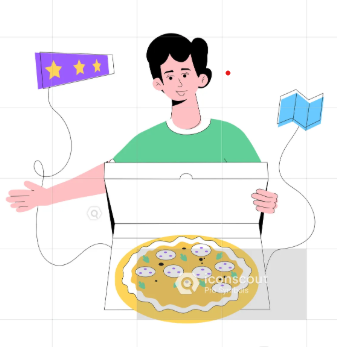

**Analyzing Text Review Column**

In [ ]:
DF_data['text'].sample(5)

,text
8068,Yummy alternative for people like me who don&#...
23023,It was very good.. Just a little to sweet. I e...
13874,Delicious! My family asked me to make it again...
6072,So easy to follow and the results were fantastic.
24053,"Turned out fine, but I probably won't make it ..."


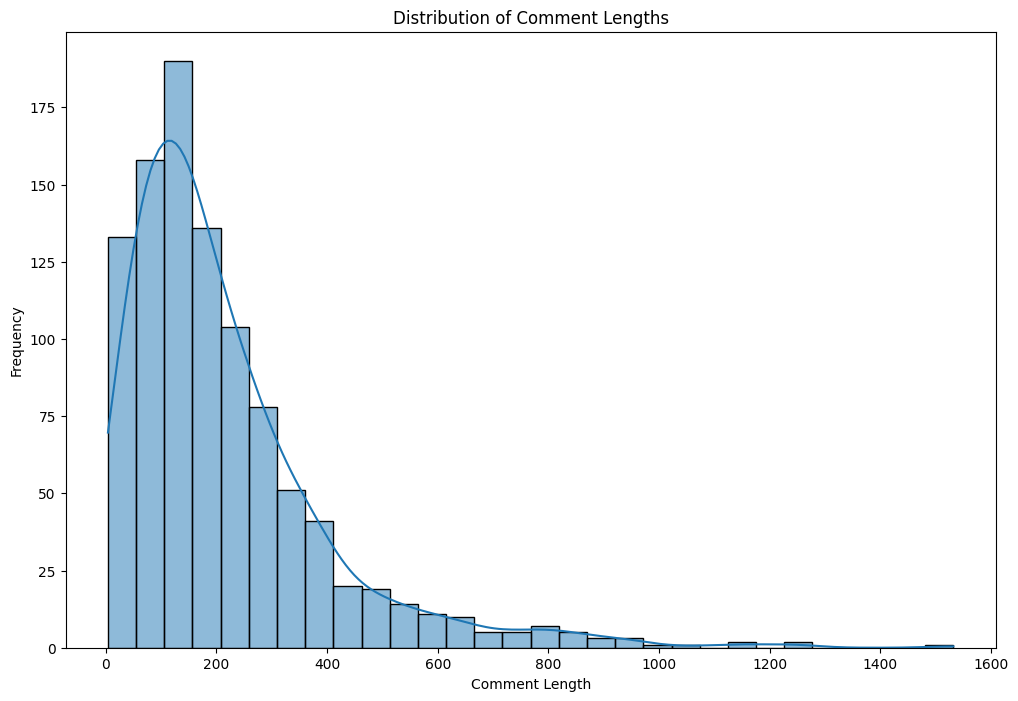

In [ ]:
comment_lengths = DF_data['text'].str.len()[:1000]
plt.figure(figsize=(12, 8))
sns.histplot(comment_lengths, bins=30, kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()



It is a right-skewed distribution, meaning most comments are short, with a few long ones extending the tail. Here are some quick insights:

Most comments are short – likely under 200 characters.
A long-tail effect – fewer comments are very long.
KDE curve confirms skewness – text length is not normally distributed.

**Preprocessing function definitions for NLP**

In [ ]:

#*********************************************************basic_clean()****************************************************************************
def basic_clean(text_review):
  text_review['text']=text_review['text'].astype(str)
  text_review['text'] = text_review['text'].str.lower()
  text_review['text'] = text_review['text'].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))
  #text_review['text']= text_review['text'].apply(word_tokenize)
  text_review['text'] = text_review['text'].apply(lambda x: re.findall(r'\b\w+\b', str(x)))
  return text_review

#*****************************************************stopwrd_punctuation_removal()*******************************************************************************
def stopwrd_punctuation_removal(text_review):
  stopwords_set = set(stopwords.words('english'))
  punctuation_set = set(string.punctuation)
  filtered_reviews = []                                                          # Create an empty list for filtered reviews
  for token_list in text_review['text']:                                         # Loop over each review (which is a list of tokens)
      filtered_tokens = []                                                       # Create a list for storing filtered tokens
      for word in token_list:                                                    # Iterate over individual words (tokens)
        if word.casefold() not in (stopwords_set | punctuation_set):             # Check if word is not a stopword or a punctuation
              filtered_tokens.append(word)                                       # Add non-stopword word to the list
      filtered_reviews.append(filtered_tokens)                                   # Append the filtered review
  return filtered_reviews
  #********************************************************apply_stemming()*******************************************************************************
 #Stemming Function porter stemmer from nltk
def apply_stemming(filtered_reviews):
    stemmer = PorterStemmer()
    stemmed_reviews = [[stemmer.stem(word) for word in tokens] for tokens in filtered_reviews]
    return stemmed_reviews
#*******************************************************sentiment_calc(label)***************************************************************************
def sentiment_calc(label):
    if label <0:
        return "negative"
    elif label==0:
        return "neutral"
    elif label>0:
        return "positive"
 #*********************************************************map_stars_to_sentiment(stars)***********************************************************************
def map_stars_to_sentiment(stars):
    if stars <= 2:
       return 'negative'
    elif stars > 4:
        return 'positive'
    else:
        return 'neutral'

#******************************************************Mapping functions*********************************************************************************
 # Define mapping function to convert sentiments in text form to numeric
def sentiment_to_numeric(sentiment):
    sentiment_map = {'negative': 0, 'neutral': 1, 'positive': 2}
    return sentiment_map.get(sentiment, -1)  # Return -1 if sentiment is unknown

#Combining numericaly converted sentiments from text and star rating
def combine_sentiments(row):
    sentiments = [row['sentiment_numeric'], row['sentiment_from_stars_numeric']]
    mode_value = pd.Series(sentiments).mode()
    return mode_value.iloc[0] if not mode_value.empty else -1  # Return -1 if no mode

# Map back to sentiment labels
def numeric_to_sentiment(numeric):
    sentiment_map = {0: 'negative', 1: 'neutral', 2: 'positive'}
    return sentiment_map.get(numeric, 'unknown')
#******************************************************************************************************************************************


NLP PIPELINE( full_nlp_pipeline(data))

In [ ]:

def full_nlp_pipeline(data):

    #************************* ***************************************** Step 1: Text Preprocessing    *********************************************************************************************
    text_review = data[["text"]].copy()                                                          # Create a temporary DataFrame for the text column.
    text_review = basic_clean(text_review)                                                       #Basic cleaning:convert to string, lowercasing, punctuation removal, and tokenization.
    text_review["preprocessed_review"] = stopwrd_punctuation_removal(text_review)                 #Remove stopwords and punctuation from the tokenized text.
    text_review["filtered_review"] = apply_stemming(text_review["preprocessed_review"])           #Converting to base form  -  Apply stemming to the filtered tokens.
    text_review["word_count"] = text_review["filtered_review"].apply(len)                         # Compute the word count for each review.

    #*************************************************************** Step 2: Sentiment Analysis on Text***********************************************************************************

    sia = SentimentIntensityAnalyzer()                                                           # Initialize the SentimentIntensityAnalyzer.
    text_review["sentiment_score"] = text_review["filtered_review"].apply(                       #Applies the sentiment analyzer to each review in the filtered_review column.
        lambda tokens: sia.polarity_scores(" ".join(tokens))["compound"]                         # Calculate the compound sentiment score by joining tokens into a string.
    )                                                                                            #Extracts the "compound" sentiment score from VADER’s output

    text_review["text_review_sentiment"] = text_review["sentiment_score"].apply(sentiment_calc)   # Convert the compound score to a sentiment label (negative, neutral, positive).

    #***************************************************************** # Merge text-based columns back into the original DataFrame.********************************************************************************
    data["preprocessed_review"] = text_review["preprocessed_review"]
    data["filtered_review"] = text_review["filtered_review"]
    data["word_count"] = text_review["word_count"]
    data["sentiment_score"] = text_review["sentiment_score"]
    data["text_review_sentiment"] = text_review["text_review_sentiment"]
    #***************************************************************************Mapping star rating,text review and combined*********************************************************

    data["sentiment_from_stars"] = data["stars"].apply(map_stars_to_sentiment)                   # Step 3: Map Star Ratings to Sentiment

    data["sentiment_numeric"] = data["text_review_sentiment"].apply(sentiment_to_numeric)        # Step 4: Convert Sentiment Labels to Numeric Values
    data["sentiment_from_stars_numeric"] = data["sentiment_from_stars"].apply(sentiment_to_numeric)

    data["Num_sentiment_stars_text"] = data.apply(combine_sentiments, axis=1)                    # Step 5: Combine Sentiments from Text and Stars Using Mode

    data["combined_sentiment_label"] = data["Num_sentiment_stars_text"].apply(numeric_to_sentiment)  # Step 6: Map the Combined Numeric Sentiment Back to a Text Label
    #************************************************************************************************************************************************************************

    #************************************************************************************************************************************************************************
    #function end
    return data

# Example usage:
DF_data= full_nlp_pipeline(DF_data)
print(DF_data[['text_review_sentiment', 'sentiment_from_stars', 'combined_sentiment_label']])


      text_review_sentiment sentiment_from_stars combined_sentiment_label
0                  positive             negative                 negative
1                  positive             negative                 negative
2                  positive             negative                 negative
3                  positive             negative                 negative
4                  positive             negative                 negative
...                     ...                  ...                      ...
28177               neutral             positive                  neutral
28178              positive             positive                 positive
28179              positive             positive                 positive
28180              positive             positive                 positive
28181              positive             positive                 positive

[28182 rows x 3 columns]


**NLP PREPROCESSING STEPS**

---

*  **STEP 5.1.1.1:Convert to Lowercase & Remove Punctuation->function basic_clean(text_review)**

Lowercasing ensures words are treated uniformly (e.g., "Great" and "great" are the same).
Removing punctuation helps avoid meaningless tokens (e.g., "Wow!" and "Wow" are the same).
Tokenization (re.findall(r'\b\w+\b', str(x))) splits the text into individual words.

*   **STEP 5.1.1.2:Remove Stopwords & Extra Punctuation->function stopwrd_punctuation_removal(text_review)**

Stopwords (like "the", "is", "and") don't carry much meaning and can be removed.
Punctuation was already removed earlier, but this ensures extra non-words are eliminated.


*   **STEP 5.1.1.3:Stemming in NLP->function apply_stemming(filtered_reviews)**

Stemming is a text normalization technique in Natural Language Processing (NLP) that reduces words to their root or stem form. The goal is to remove suffixes and variations of words to simplify text analysis.

For example:

"running" → "run"

"easily" → "easili"

"happier" → "happi"

It helps in reducing the dimensionality of text data, improving computational efficiency for tasks like sentiment analysis, search engines, and text classification.




In [ ]:
DF_data.shape

(28182, 25)

**Preprocessed columns are added to existing dataframe**

In [ ]:
DF_data.columns

Index(['num_records', 'recipe_number', 'recipe_code', 'recipe_name',
       'comment_id', 'user_id', 'user_name', 'user_reputation', 'created_at',
       'reply_count', 'thumbs_up', 'thumbs_down', 'stars', 'best_score',
       'text', 'preprocessed_review', 'filtered_review', 'word_count',
       'sentiment_score', 'text_review_sentiment', 'sentiment_from_stars',
       'sentiment_numeric', 'sentiment_from_stars_numeric',
       'Num_sentiment_stars_text', 'combined_sentiment_label'],
      dtype='object')

In [ ]:
DF_data['filtered_review'].sample(5)#text review converted to words in base form

,filtered_review
24993,"[disappoint, didnâ, tast, expect]"
6135,"[way, salti, throw, away]"
12047,"[enjoy, recip, flavor]"
5319,"[best, dish, iâ, made, long, time, highli, rec..."
1895,"[fantast, simpl, recipeeveryon, alway, rave, d..."


**STEP 5.1.2:SENTIMENT ANALYSIS**

---

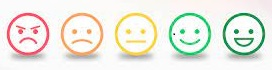

**STEP 5.1.2.1:SENTIMENT ANALYSIS-TEXT REVIEW**

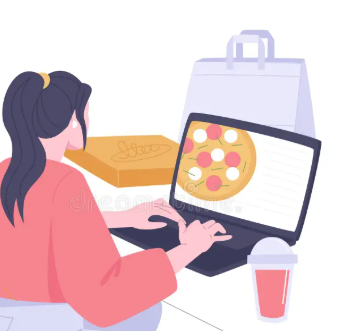

Sentiment Analysis in recipe reviews involves using Natural Language Processing (NLP) techniques to analyze user feedback and **determine whether a review is positive, negative, or neutral**.
 This helps understand user satisfaction, common complaints, and popular features of recipes.

* Sentiment Analysis: The SentimentIntensityAnalyzer **from NLTK's VADER** is used to analyze the sentiment of each review.

 Example: Sentiment Analysis on Recipe Reviews
Sample Reviews:

"This recipe is amazing! The flavors are perfect." → Positive 😀

"The dish was too salty and took too long to cook." → Negative 😡

"It was okay, but I have had better." → Neutral 😐

filtered_review is a list of words, but VADER expects a full sentence (string).
**join(x) converts ["amazing", "recipe", "love"] → "amazing recipe love"**, making it valid input for sentiment analysis.

SentimentAnalyzer() calculates a sentiment score for each review using the VADER (Valence Aware Dictionary and sEntiment Reasoner) model from NLTK.
* The compound score reflects the overall sentiment,
  *  where positive values indicate positive sentiment
  *  negative values indicate negative sentiment,
  *  values close to zero indicate neutral sentiment.


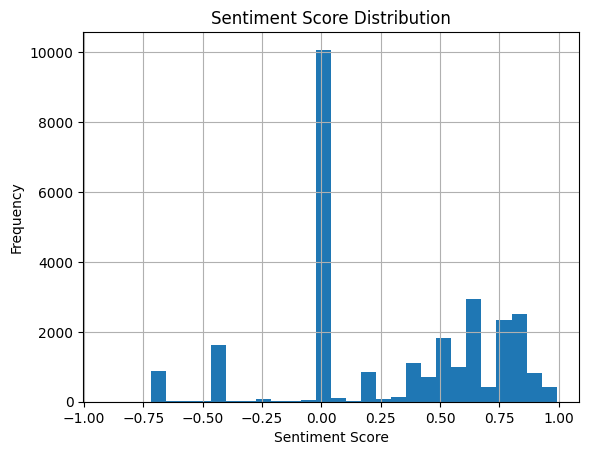

In [ ]:
DF_data["sentiment_score"].hist(bins=30)
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

our histogram represents the distribution of sentiment scores in your recipe reviews dataset.

Interpreting the Sentiment Score Distribution:
X-axis (Sentiment Score): Ranges from -1 (Negative) to +1 (Positive).
Y-axis (Frequency): Number of reviews corresponding to each sentiment score.
Observations:
The histogram shows a strong peak at 0, suggesting a large number of neutral or zero-valued data points. There is also a skewed distribution with more values concentrated towards the positive side, indicating an imbalance.

In [ ]:
print(DF_data['sentiment_score'].min())
print(DF_data['sentiment_score'].max())

-0.9081
0.9907


**sentiment_calc(label) function** categorizes sentiment scores into three labels: positive, negative, or neutral based on their values.

Breaking it Down Simply:


*  If the sentiment score is less than 0 → Label it as "negative"
*  If the sentiment score is exactly 0 → Label it as "neutral"
*  If the sentiment score is greater than 0 → Label it as "positive"








**Analyzing Sentement from Text Review**

In [ ]:
DF_data['text_review_sentiment'].value_counts()

,count
text_review_sentiment,
positive,15296
neutral,10065
negative,2821


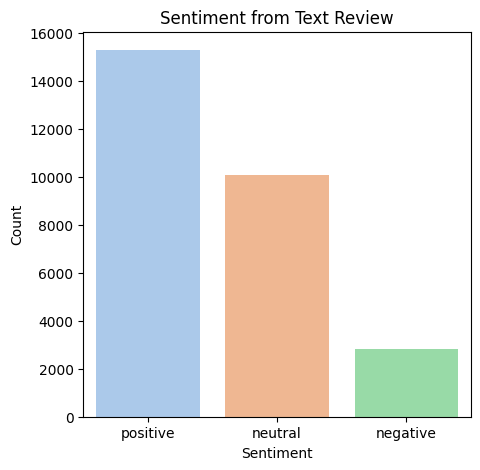

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='text_review_sentiment', data = DF_data,palette="pastel")
plt.title("Sentiment from Text Review")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()




*  **Highly Positive Sentiment Bias**:The majority (80%) of sentiment scores are positive, suggesting that the **data is heavily skewed toward positive sentiments.**This could be due to the nature of the dataset.

* Low Neutral Sentiments:Only 16% of responses are neutral, indicating that most people express a clear opinion rather than staying neutral.

* Minimal Negative Sentiment:Just 4% of the data is negative, meaning very few negative responses exist.
If this data is related to customer feedback, it suggests high satisfaction.

**STEP 5.1.2.2:SENTIMENT ANALYSIS -STAR RATING**

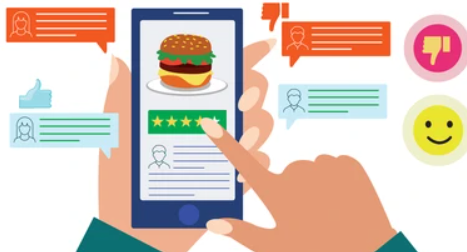

**Analyzing Star Rating**

In [ ]:
DF_data['stars'].value_counts()

,count
stars,
4,9948
3,8966
2,4234
1,4015
5,1019


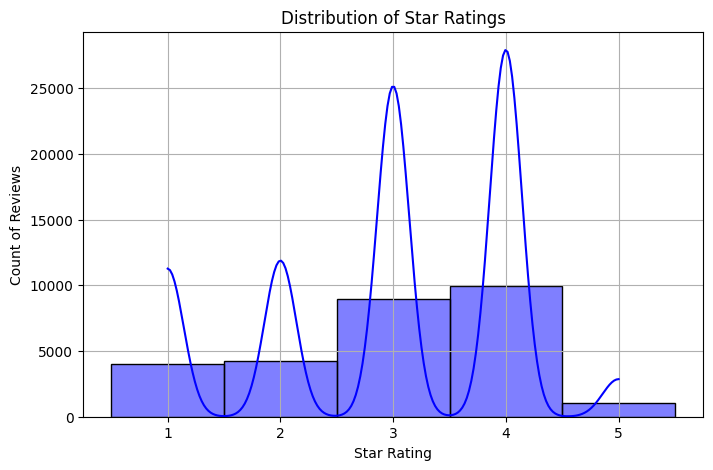

,stars
count,28182.000000
mean,2.990136
std,1.103482
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [ ]:
# Plot the distribution of star ratings
plt.figure(figsize=(8, 5))
sns.histplot(DF_data['stars'], bins=6, kde=True, discrete=True, color='blue')
plt.xlabel("Star Rating")
plt.ylabel("Count of Reviews")
plt.title("Distribution of Star Ratings")
plt.grid(True)
plt.show()

# Summary statistics for star ratings
DF_data['stars'].describe()

**Star Rating Analysis**:
 * Bimodal or Multimodal Distribution: The KDE curve suggests peaks at 1, 2, 3, and 4 stars, possibly indicating mixed sentiments rather than a normal distribution.
* Mean Rating 3.0: The average rating is close to neutral, suggesting a balanced mix of positive and negative reviews.
Right-Skewed Tail: Fewer reviews are at 5 stars, with most clustering around 3 and 4 stars.
* Standard Deviation (1.1): Shows moderate variability in ratings.
Interquartile Range (IQR): 50% of the reviews are between 2 and 4 stars.

**Replace 0 with the mean rating**

In [ ]:
mean_rating = (DF_data['stars'].mean())
mean_rating

2.9901355475125966

In [ ]:
mean_rating = round(mean_rating)
mean_rating

3

In [ ]:
DF_data['stars'] = DF_data['stars'].replace(0,mean_rating)

In [ ]:
DF_data['stars'].value_counts()

,count
stars,
4,9948
3,8966
2,4234
1,4015
5,1019


**Analyzing Sentement from Star Rating**


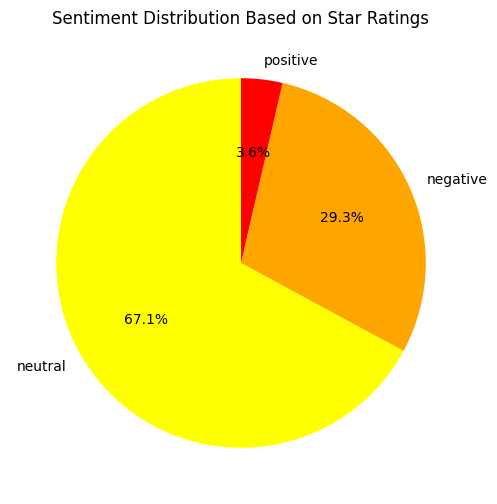

In [ ]:
sentiment_counts = DF_data['sentiment_from_stars'].value_counts()
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['yellow','ORANGE','RED'])
# Add a title
plt.title('Sentiment Distribution Based on Star Ratings')
# Show the pie chart
plt.show()

Majority Neutral (67.1%) – Most reviews are neither strongly positive nor negative.
High Negative Sentiment (29.3%) – A significant portion of reviews express dissatisfaction.
Very Few Positive Reviews (3.6%) – Positive sentiment is minimal, indicating possible customer dissatisfaction or rating bias.

In [ ]:
print(DF_data[['sentiment_score','text_review_sentiment','stars', 'sentiment_from_stars']].sample(7))

       sentiment_score text_review_sentiment  stars sentiment_from_stars
8680            0.8271              positive      2             negative
19189           0.0000               neutral      4              neutral
28020          -0.4019              negative      5             positive
7744           -0.5719              negative      2             negative
5197            0.8316              positive      2             negative
9558            0.6369              positive      3              neutral
25521           0.0000               neutral      4              neutral


In [ ]:
DF_data['sentiment_match'] = DF_data['text_review_sentiment'] == DF_data['sentiment_from_stars']
match_percentage = DF_data['sentiment_match'].mean() * 100
print(f"Sentiment match percentage: {match_percentage:.2f}%")

Sentiment match percentage: 30.79%


**STEP 5.1.2.3: Combining sentiments from text review and star rating to create a new  TARGET COLUMN**

The mode() function returns the most frequently occurring value(s) in a series.
If there are multiple values with the same highest frequency, it returns all of them.
1. mode_value.iloc[0]: This returns the first value in the mode_value series. If there's only one mode value, this will return it. If there are multiple mode values, this will return the first one.
2. if not mode_value.empty: This checks if the mode_value series is not empty. If it's not empty, that means there's at least one mode value.
3. else -1: If the mode_value series is empty, that means there's no mode value. In this case, the code returns -1.

Checking combined sentimemt performance

In [ ]:
DF_data['sentiment_match'] = DF_data['text_review_sentiment'] == DF_data['combined_sentiment_label']
match_percentage = DF_data['sentiment_match'].mean() * 100
print(f"Combined Sentiment percentage: {match_percentage:.2f}%")

Combined Sentiment percentage: 40.58%


**Analyzing Combined Review from Text Review and Star Rating**

In [ ]:
DF_data[['Num_sentiment_stars_text','combined_sentiment_label']].value_counts()

,,count
Num_sentiment_stars_text,combined_sentiment_label,
1,neutral,17169
0,negative,10565
2,positive,448


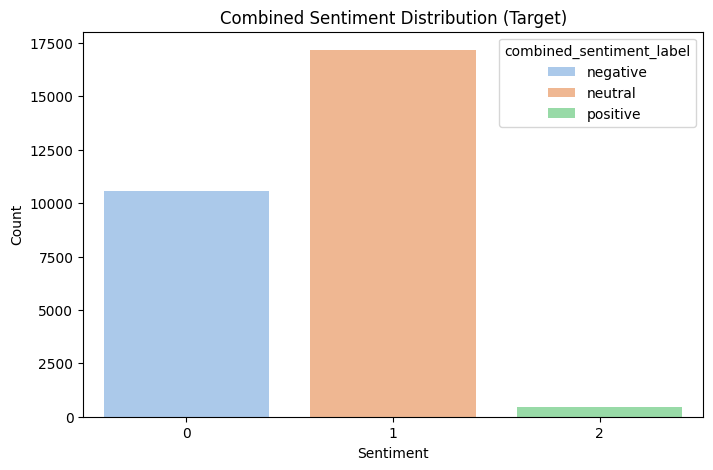

In [ ]:
fig = plt.figure(figsize=(8,5))
sns.countplot(x=DF_data['Num_sentiment_stars_text'],data = DF_data,palette="pastel",hue=DF_data['combined_sentiment_label'])
plt.title('Combined Sentiment Distribution (Target)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

The sentiment distribution is highly imbalanced, with neutral sentiment being the most common, followed by negative, and very few positive instances. This imbalance may affect model performance, requiring techniques like resampling or weighted loss functions for better classification

**STEP 5.1.3:TEXT- Feature Extraction and Transformation**
1. Bag-of-Words (BoW): Represent text as a bag or a set of its word occurrences without considering grammar or word order.
2. Term Frequency-Inverse Document Frequency (TF-IDF): Weight word occurrences by their importance in the entire corpus.


In [ ]:
categorical_features = DF_data.select_dtypes(include=['object']).columns.tolist()

In [ ]:
categorical_features

['recipe_code',
 'recipe_name',
 'comment_id',
 'user_id',
 'user_name',
 'created_at',
 'text',
 'preprocessed_review',
 'filtered_review',
 'text_review_sentiment',
 'sentiment_from_stars',
 'combined_sentiment_label']

**STEP 5.1.3.1 Bag of Words (BoW)**

---
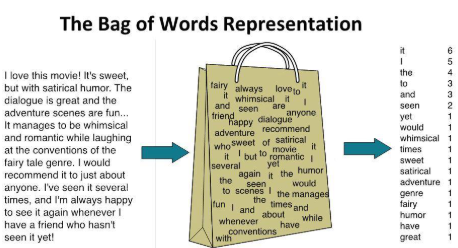



BoW creates a matrix where each row is a document, and each column represents a unique word in the corpus.
**The values in the matrix are word counts for each word in each document.**

In [ ]:
def BagOfWordsAlgthm(data):
  # Sample DataFrame with a 'filtered_review' column
  data['filtered_review'] =data['filtered_review'].astype(str)
  documents = data['filtered_review'].tolist()
  vectorizer = CountVectorizer(max_features=500)                                                  # to extract word counts
  X_train_vec = vectorizer.fit_transform(documents)                                               # Fit and transform the documents to extract features
  bag_of_words_df=pd.DataFrame(X_train_vec.toarray(),columns=vectorizer.get_feature_names_out())  #Convert to a DataFrame for better readability
  #get_feature_names_out() ->It returns a list of the feature names (words) that are
  # considered significant according to the vectorizer(column names).
  # Print the DataFrame of word counts
  return bag_of_words_df
#calling  BagOfWordsalgoth()
bag_of_words_df=BagOfWordsAlgthm(DF_data)
bag_of_words_df.sample(5)

,10,12,13,14,15,20,30,34,absolut,actual,...,worth,would,wouldn39t,wow,written,wrong,year,yet,yum,yummi
14539,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


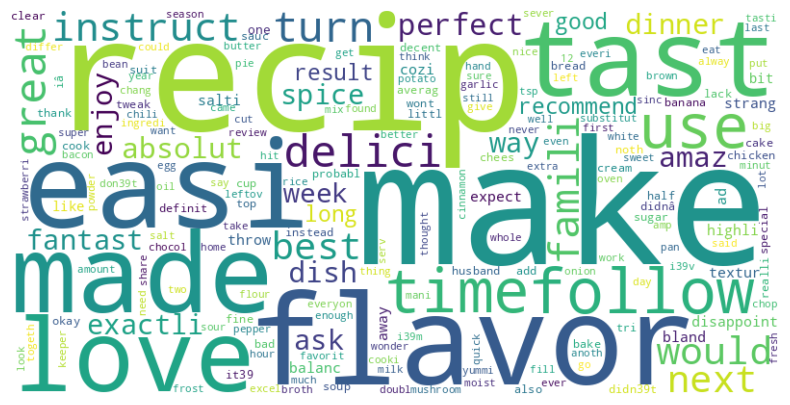

In [ ]:
# Summing up word counts across all rows
word_frequencies = bag_of_words_df.sum(axis=0).to_dict()
# Generating the Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)
# Plotting the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()


**STEP 5.1.3.2 TF_IDF :TERM FREQUENCY INVERSE DOCUMENT FREQUENCY**

TF (Term Frequency): Measures how frequently a term (word) appears in a document.

IDF (Inverse Document Frequency): Measures how important a term is within the entire corpus. Words that appear in many documents will have a lower IDF score because they are less useful for distinguishing between documents.

TF-IDF: Combines both metrics to evaluate how important a word is in a document relative to the entire corpus. The higher the TF-IDF score, the more important the word is.

TfidfVectorizer(max_features=500)->to convert a collection of text documents into a matrix of TF-IDF features, while limiting the number of features (terms) by 500

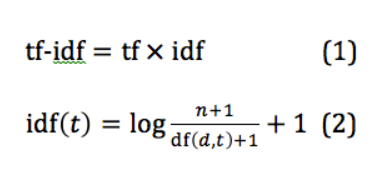

In [ ]:

def TFIDF_Converter(data):
    data['filtered_review'] = data['filtered_review'].astype(str)  # Ensure text format

    vectorizer = TfidfVectorizer(max_features=1000)
    X_train_vec = vectorizer.fit_transform(data['filtered_review'])  # Fit on training data

    # Save the vectorizer
    joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

    # Find most important words
    word_importance = X_train_vec.sum(axis=0).A1
    word_importance_df = pd.DataFrame(word_importance, index=vectorizer.get_feature_names_out(), columns=["importance"])
    word_importance_df = word_importance_df.sort_values(by="importance", ascending=False)

    top_n_words = word_importance_df.head(10).index.tolist()  # Top 10 words

    # Save top_n_words
    try:
        joblib.dump(top_n_words, "/content/top_n_words.pkl")
        print("File saved successfully!")
    except Exception as e:
        print("Error while saving:", e)

    # Create DataFrame with selected words
    df_train = pd.DataFrame(X_train_vec.toarray(), columns=vectorizer.get_feature_names_out())

    # Add full TF-IDF vector as a separate column (convert sparse matrix row to dense array)
    df_train["full_tfidf_vector"] = list(X_train_vec.toarray())  # Each row contains full TF-IDF array

    # Return DataFrame with 10 word-based features + 1 column containing full TF-IDF vectors
    return vectorizer, top_n_words, df_train[top_n_words + ["full_tfidf_vector"]]


This process vectorizes the text data (the reviews) into a TF-IDF matrix, calculates the importance of each word across all reviews, and then extracts the most important words.
The final output, df_top_n, contains a DataFrame with the full  TF-IDF values and the top 10 most important words for each review.


**STEP 5.1.3.3:Concatinating TF-IDF vectors and converted columns(top 10) to Dataframe**

Reset the index of one or both DataFrames before concatenating.This will reset the index of both DataFrames to a default integer index, which should allow them to be concatenated without null values.

In [ ]:
# Append the selected TF-IDF features (top N words) to the original 'data' DataFrame
#data = pd.concat([data, df_top_n], axis=1)
def combine_df(data):
  data.reset_index(drop=True, inplace=True)
  vectorizer, top_n_words, df_topn_n = TFIDF_Converter(data)
  #df_topn_n=TFIDF_Converter(data)
  df_topn_n.reset_index(drop=True, inplace=True)
  data = pd.concat([data, df_topn_n], axis=1)
  return data, vectorizer, top_n_words
#calling combine_df()
DF_data, vectorizer, top_n_words = combine_df(DF_data)
# View the updated DataFrame with top N TF-IDF features
DF_data.head(5)

File saved successfully!


,num_records,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,...,recip,flavor,easi,follow,tast,enjoy,instruct,love,turn,full_tfidf_vector
0,102,93,42873,Teriyaki Chicken Thighs,sp_aUSaElGf_42873_c_194460,u_1oKVtLXZGhtF7qYBAQS2ruGc8YS,centralvacmama,1,1622717311,0,...,0.040746,0.0,0.048925,0.0,0.0,0.0,0.0,0.053667,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,103,93,42873,Teriyaki Chicken Thighs,sp_aUSaElGf_42873_c_159198,u_1oKWLznz48IqIKPR6JK1eGxOSd5,marysanderson,1,1622717104,0,...,0.151031,0.0,0.000000,0.0,0.0,0.0,0.0,0.099463,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,104,93,42873,Teriyaki Chicken Thighs,sp_aUSaElGf_42873_c_164745,u_1oKVZihGobLOKlsxbE8o1AMyiNe,valanddansmith,1,1622717133,0,...,0.130677,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,105,93,42873,Teriyaki Chicken Thighs,sp_aUSaElGf_42873_c_125226,u_1oKWA3hv9YGTVBBVfhnXob8dgZu,topaznights,1,1622716965,0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.171232,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,106,93,42873,Teriyaki Chicken Thighs,sp_aUSaElGf_42873_c_302556,u_1oKWLznz48IqIKPR6JK1eGxOSd5,marysanderson,1,1622717828,0,...,0.000000,0.0,0.168627,0.0,0.0,0.0,0.0,0.184974,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
DF_data.shape #shape increased

(28182, 37)

**STEP 5.2:Remove Irrelevant Columns**

In [ ]:
DF_data.columns

Index(['num_records', 'recipe_number', 'recipe_code', 'recipe_name',
       'comment_id', 'user_id', 'user_name', 'user_reputation', 'created_at',
       'reply_count', 'thumbs_up', 'thumbs_down', 'stars', 'best_score',
       'text', 'preprocessed_review', 'filtered_review', 'word_count',
       'sentiment_score', 'text_review_sentiment', 'sentiment_from_stars',
       'sentiment_numeric', 'sentiment_from_stars_numeric',
       'Num_sentiment_stars_text', 'combined_sentiment_label',
       'sentiment_match', 'make', 'recip', 'flavor', 'easi', 'follow', 'tast',
       'enjoy', 'instruct', 'love', 'turn', 'full_tfidf_vector'],
      dtype='object')

In [ ]:
#Drop columns that are not useful for analysis.
def irrelevant_columns(data):
   data = data.drop(columns=['recipe_name',
    'recipe_number', 'recipe_code', 'comment_id', 'user_id','num_records','sentiment_match',
    'user_name', 'user_reputation', 'reply_count', 'best_score','sentiment_score', 'combined_sentiment_label',
    'preprocessed_review', 'thumbs_up', 'thumbs_down', 'text','sentiment_numeric',
    'word_count', 'stars', 'text_review_sentiment','created_at','sentiment_from_stars_numeric','filtered_review','sentiment_from_stars'
    ])
   return data

Updated_data=irrelevant_columns(DF_data)

In [ ]:
Updated_data.shape #top 10 words,full tfidf vectors and target combined sentiments

(28182, 12)

In [ ]:
Updated_data.columns

Index(['Num_sentiment_stars_text', 'make', 'recip', 'flavor', 'easi', 'follow',
       'tast', 'enjoy', 'instruct', 'love', 'turn', 'full_tfidf_vector'],
      dtype='object')

In [ ]:
Updated_data.head(2)

,Num_sentiment_stars_text,make,recip,flavor,easi,follow,tast,enjoy,instruct,love,turn,full_tfidf_vector
0,0,0.038386,0.040746,0.0,0.048925,0.0,0.0,0.0,0.0,0.053667,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,0,0.142283,0.151031,0.0,0.000000,0.0,0.0,0.0,0.0,0.099463,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


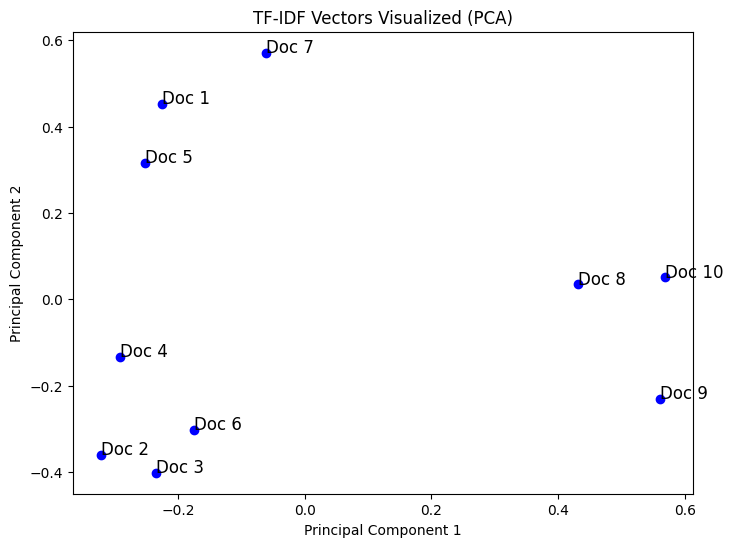

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Select the first 10 rows for visualization
X = np.array(Updated_data['full_tfidf_vector'].iloc[:10].tolist())  # Convert the first 10 TF-IDF vectors to a NumPy array

# Step 2: Dimensionality Reduction (PCA or t-SNE)
# Using PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Step 3: Plotting the reduced vectors
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], color='b', marker='o')

# Annotating the points (optional) - Limit to first 10 rows
for i, txt in enumerate(DF_data['full_tfidf_vector'].iloc[:10]):
    plt.annotate(f"Doc {i+1}", (X_reduced[i, 0], X_reduced[i, 1]), fontsize=12)

plt.title('TF-IDF Vectors Visualized (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


* selecting the first 10 rows from the full_tfidf_vector column of the Updated_data DataFrame and converts them into a NumPy array. These vectors represent the textual data transformed into numerical form using TF-IDF.
* This creates a PCA object with 2 components (i.e., reducing the dimensionality of the data to two dimensions) and applies PCA to the TF-IDF vectors (X). The result is stored in X_reduced.

**STEP 5.3:Handle Missing Values:**

In [ ]:
#data.isnull().sum() #isnull() ->used to identify or detect the missing values in the data frame.
Updated_data.isna().sum()

,0
Num_sentiment_stars_text,0
make,0
recip,0
flavor,0
easi,0
follow,0
tast,0
enjoy,0
instruct,0
love,0


In [ ]:
Updated_data.dropna(inplace=True)#The dropna() method removes the rows that contains NULL values

In [ ]:
Updated_data.isna().sum()

,0
Num_sentiment_stars_text,0
make,0
recip,0
flavor,0
easi,0
follow,0
tast,0
enjoy,0
instruct,0
love,0


**STEP 5.4 :Handle Duplicated values**

In [ ]:
list_columns = Updated_data.select_dtypes(include=[object]).columns
list_columns

Index(['full_tfidf_vector'], dtype='object')

In [ ]:
list_columns.duplicated().sum() #no duplicates

0

In [ ]:
num_columns = Updated_data.select_dtypes( include=['number'])
num_columns.columns

Index(['Num_sentiment_stars_text', 'make', 'recip', 'flavor', 'easi', 'follow',
       'tast', 'enjoy', 'instruct', 'love', 'turn'],
      dtype='object')

In [ ]:
num_columns.duplicated().sum()

21896

For Sentiment Analysis: If duplicates are valid and reflect the actual sentiment (e.g., multiple reviews sharing the same sentiment score), there is no need to remove them.

For Feature Columns: If the feature columns represent important aspects of the reviews (e.g., keywords or aspects like "good," "delicious," etc.), duplicates are fine and reflect the frequency of those words.

For Time Features: Duplicates in time-based columns typically aren't an issue since multiple reviews can be made at the same time.

Checking constant valued columns

In [ ]:
columns_with_one_unique_value = num_columns.columns[num_columns.nunique() == 1]
print(columns_with_one_unique_value) #NO CONSTANT VALUES

Index([], dtype='object')


**STEP 5.5 :Outlier Detection**



---

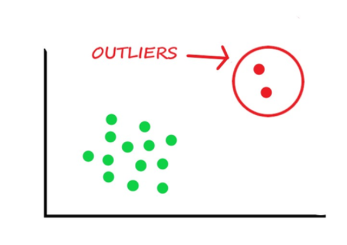

**STEP 5.5.1 Visual Inspection**

**FIGURE 5.5.1.1 HISTOGRAM**-NUMERICAL columns

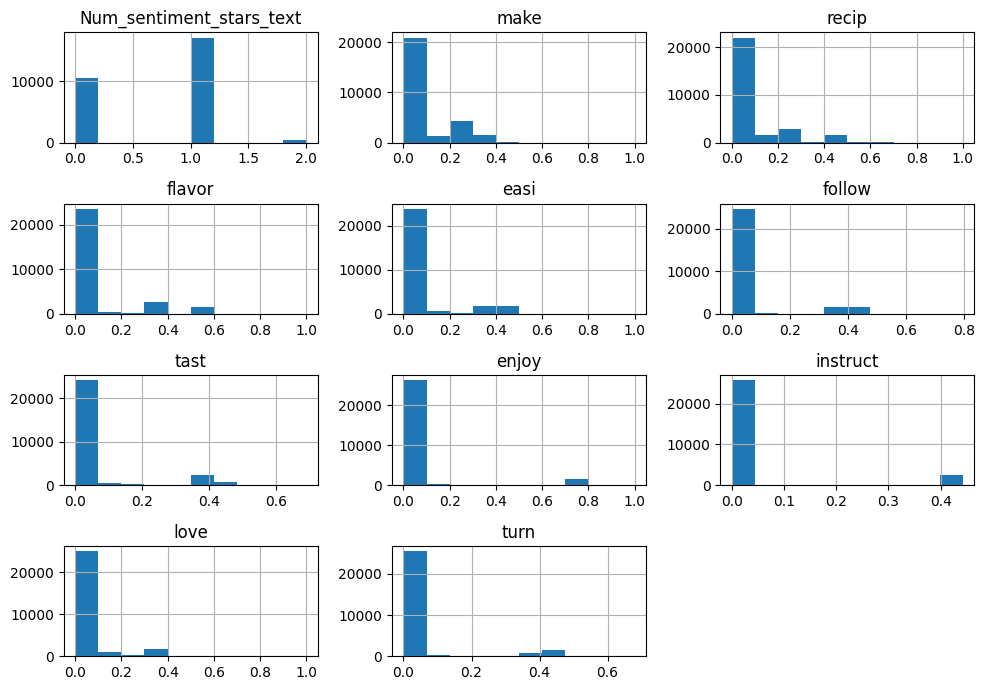

In [ ]:
num_columns.hist(figsize=(10, 7))
plt.tight_layout()
plt.show()

The histograms show the distribution of TF-IDF scores for selected words across reviews. Key insights:

* Most words have very low TF-IDF values, meaning they appear infrequently in individual reviews.
* A few words like "make," "recipe," "flavor," and "taste" have slightly higher frequencies, suggesting they are commonly mentioned in reviews.
* The majority of values are close to 0, indicating sparsity in the TF-IDF matrix, which is expected in text data.

**FIGURE 5.5.1.2 BOX PLOT**-NUMERICAL COLUMNS

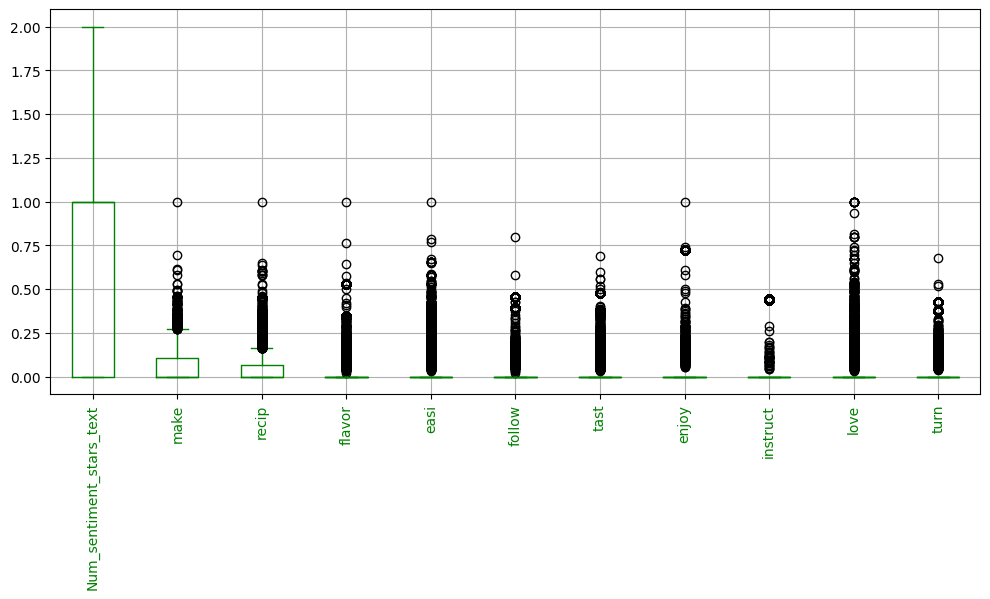

In [ ]:
num_columns.boxplot( figsize=(12,5),color="green")
plt.xticks(rotation=90,color="green")
plt.show()

The boxplot provides key insights into the distribution of TF-IDF scores for selected words in the dataset:

Most TF-IDF values are close to zero, meaning these words appear infrequently in individual reviews.
There are many outliers (black circles above the whiskers), indicating that some reviews contain these words much more frequently than others.
The median TF-IDF values are very low for all words, reinforcing the sparse nature of the text data.
"Num_sentiment_stars_text" has a wider spread, suggesting more variation compared to individual words.

**FIGURE 5.5.1.3-HISTOGRAM AND BOX PLOT**

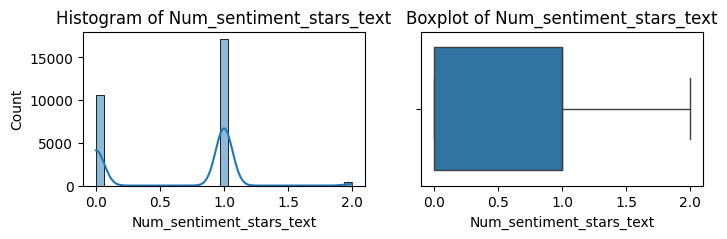

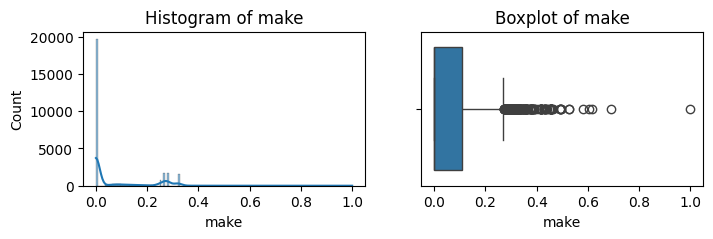

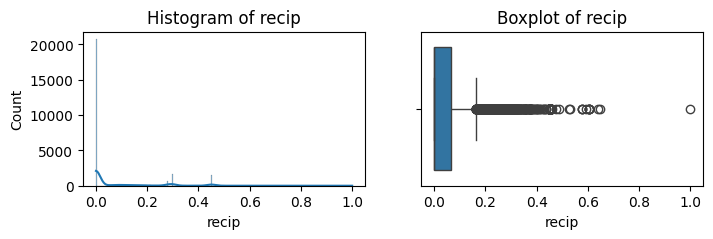

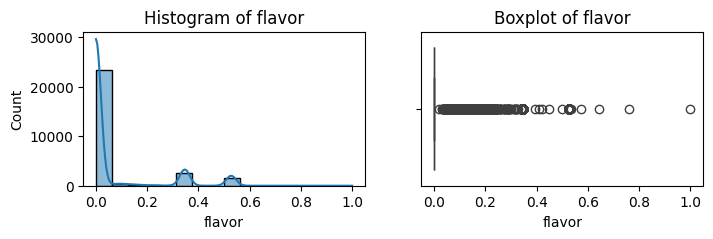

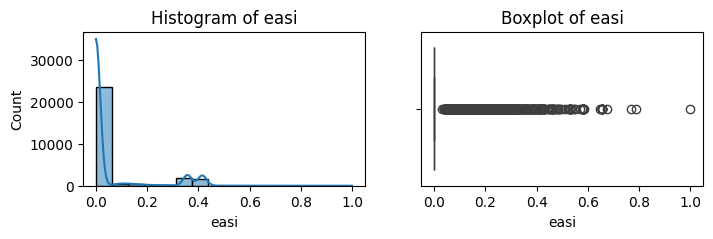

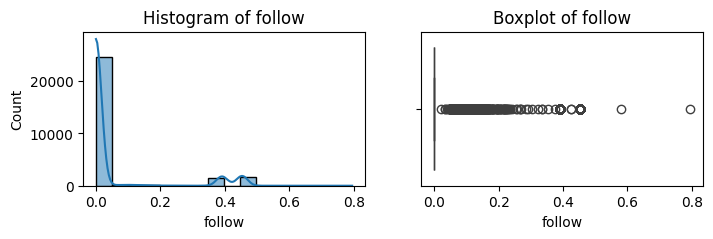

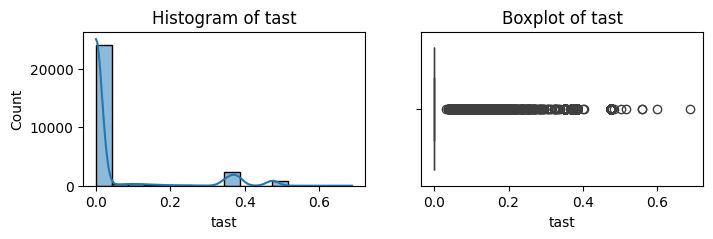

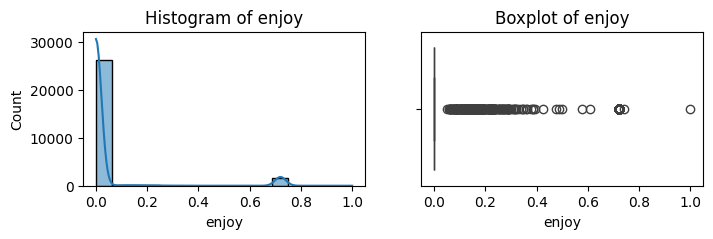

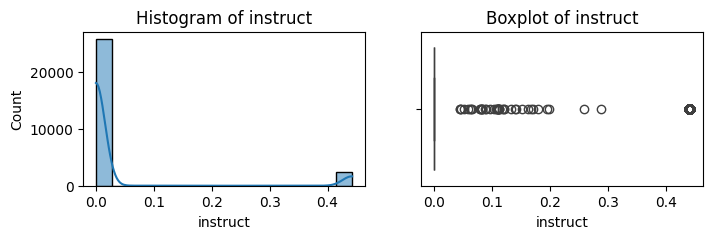

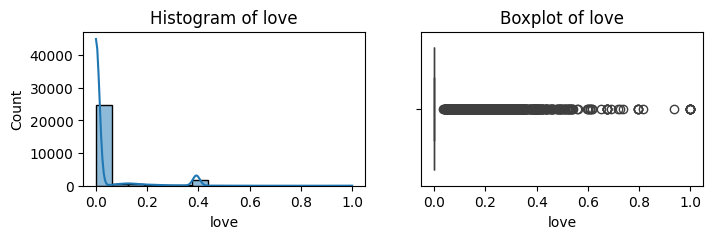

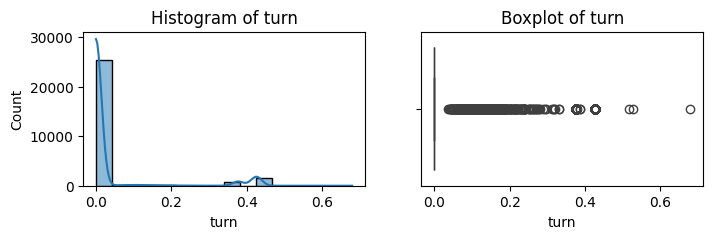

In [ ]:
for column in num_columns:
    plt.figure(figsize=(8,2))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(Updated_data[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=pd.Series(Updated_data[column]))
    plt.title(f'Boxplot of {column}')

Right-Skewed Distribution:

The histogram shows that most values of make are concentrated near 0, with a long tail extending towards 1.
This indicates a highly skewed distribution, suggesting that a few values are significantly higher than the rest.
Presence of Outliers:

The boxplot reveals multiple outliers on the higher end of the make variable.
These outliers could influence statistical models and might need further investigation or treatment (e.g., transformation or removal).
Data Sparsity:

The histogram has a few distinct peaks, which could indicate categorical or discrete-like behavior in the variable.
Most of the data points are concentrated in a small range, suggesting potential redundancy in higher values.

**STEP 5.5.2:compute the skewness & kurtosis of dataset**


**STEP 5.5.2.1 Skewness**
Indicates the asymmetry or "tilt" of the distribution of values in a column.

Skewness > 0 (positive skew): The distribution has a long right tail.

 Skewness < 0 (negative skew): The distribution has a long left tail

 Skewness ≈ 0: The data is approximately symmetrical

  Skewness is a measure of symmetry (or, more specifically, the lack of symmetry in the data set), which can be positive or negative.

---



In [ ]:
num_columns=Updated_data.select_dtypes( include=['number'])
num_columns.skew()

,0
Num_sentiment_stars_text,-0.228738
make,1.286786
recip,1.881650
flavor,2.133145
easi,2.172194
follow,2.421962
tast,2.372350
enjoy,3.805409
instruct,3.004205
love,3.114370


SKEWNESS BAR PLOT

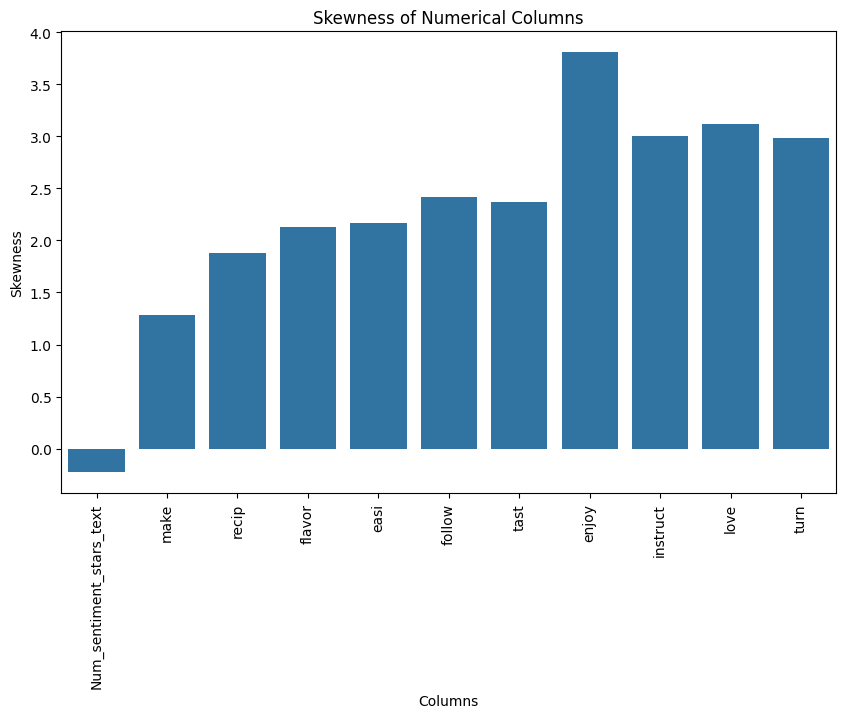

In [ ]:
skewness = num_columns.skew()
plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.index, y=skewness.values)
plt.title('Skewness of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=90)
plt.show()


Most Features Are Positively Skewed – Except for Num_sentiment_stars_text, all other numerical columns have positive skewness, meaning their distributions have longer right tails.
Highly Skewed Columns – enjoy has the highest skewness, followed by instruct, love, and turn, indicating that these variables have extreme values on the higher end.
Potential Transformations Needed – Columns with high skewness might benefit from log transformation, square root transformation, or Box-Cox transformation to normalize their distributions.

**STPEP 5.5.2.2 kurtosis Measeure of outliers present in the dataset**

Kurtosis Analysis
Kurtosis measures the "tailedness" of a distribution:

High Kurtosis (>3): Heavy tails, meaning more extreme outliers.
Low Kurtosis (<3): Light tails, meaning fewer outliers.

In [ ]:
Updated_data["Sentement_num"]=Updated_data["Num_sentiment_stars_text"].copy()
Updated_data["Sentement_num"]=Updated_data["Sentement_num"].astype(str) #target backup


In [ ]:

kurtosis(num_columns)

array([-1.13935933,  0.03923284,  2.29595563,  3.04610337,  3.06136964,
        3.98248067,  3.94001227, 12.58413865,  7.03298365,  9.54198341,
        7.07004733])

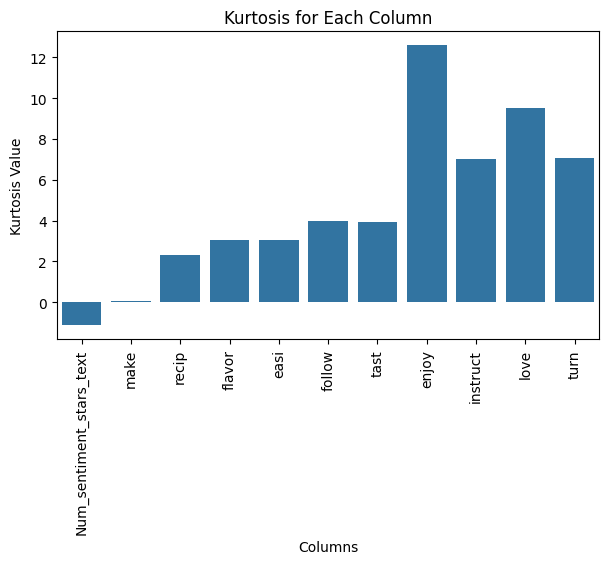

In [ ]:
plt.figure(figsize=(7,4))
k = num_columns.apply(kurtosis)
sns.barplot(x=k.index, y=k.values)
plt.title('Kurtosis for Each Column')
plt.xlabel('Columns')
plt.ylabel('Kurtosis Value')
plt.xticks(rotation=90)
plt.show()


The higher kurtosis values (e.g., 12.5, 9.2, 7.0) suggest that some of the data points are heavily concentrated around the mean, with extreme values or outliers being more frequent than expected in a normal distribution.

**STEP 5.5.3 Outlier removal**

**STEP 5.5.3.1: Log Transformation:**

To handle skewed data and potentially make it more normally distributed,log transformation can be used. This is especially useful when your data has positive skewness (right-skewed distributions), as it compresses larger values more than smaller ones and can help in stabilizing the variance.



In [ ]:
num_columns=Updated_data.select_dtypes( include=['number'])
num_columns.skew()

,0
Num_sentiment_stars_text,-0.228738
make,1.286786
recip,1.881650
flavor,2.133145
easi,2.172194
follow,2.421962
tast,2.372350
enjoy,3.805409
instruct,3.004205
love,3.114370


In [ ]:
skew_values = num_columns.skew()
# Add constant to make all skew values positive before log transformation
min_value = skew_values.min()  # Find the minimum skewness value
constant = abs(min_value) + 1  # Add the absolute value of the minimum + 1
# Apply log transformation to skewness values
log_transformed_skew = np.log(skew_values + constant)
# Apply log transformation directly to the numeric columns
num_columns_log_transformed = np.log(num_columns + constant)
# Update the original `data` with the transformed columns
Updated_data[num_columns_log_transformed.columns] = num_columns_log_transformed
Updated_data[num_columns_log_transformed.columns].skew()

,0
Num_sentiment_stars_text,-0.413924
make,1.246459
recip,1.786389
flavor,2.064762
easi,2.131741
follow,2.406668
tast,2.333998
enjoy,3.787246
instruct,3.003025
love,2.963173


**STEP 5.5.3.2 :Z-Score Method (Standard Score)**

 This method is effective when the data is normally distributed.This method involves calculating the Z-score for each data point in the dataset, which tells you how many standard deviations away the point is from the mean. Data points that are too far from the mean (usually with a Z-score above a threshold, e.g., 3 or below -3) are considered outliers.


In [ ]:

# Calculate Z-scores for each numeric column
z_scores = np.abs(zscore(Updated_data[num_columns.columns]))

# Filter out rows where any column has a Z-score greater than 3
Updated_data= Updated_data[(z_scores < 3).all(axis=1)]



In [ ]:
num_columns=Updated_data.select_dtypes( include=['number'])
num_columns.skew()

,0
Num_sentiment_stars_text,-0.216353
make,1.468761
recip,2.396422
flavor,3.838050
easi,2.652053
follow,3.020171
tast,2.816016
enjoy,11.277005
instruct,28.400542
love,3.930453


In [ ]:
Updated_data[num_columns.columns] = np.log1p(Updated_data[num_columns.columns])  # log(x + 1)


In [ ]:
num_columns=Updated_data.select_dtypes( include=['number'])
num_columns.skew()

,0
Num_sentiment_stars_text,-0.246183
make,1.439524
recip,2.328870
flavor,3.795404
easi,2.618603
follow,3.007690
tast,2.789637
enjoy,10.968855
instruct,27.824458
love,3.847026


**STEP 5.5.3.3 Box-Cox Transformation**

The Box-Cox transformation is a power transformation technique used to stabilize variance and make data more normally distributed by adjusting the parameter
𝜆
λ. It is particularly useful for skewed or heteroscedastic data, and works by applying a power function to the data, with
𝜆
λ chosen to maximize normality.

In [ ]:


# Recompute skewness
skew_values = num_columns.skew()

# Columns still highly right-skewed (>1) → Apply Box-Cox (needs positive values)
boxcox_cols = skew_values[skew_values > 1].index.tolist()

# Columns still highly left-skewed (<-1) → Apply exponential transformation
exp_transform_cols = skew_values[skew_values < -1].index.tolist()

# Apply Box-Cox transformation (only for positive values)
for col in boxcox_cols:
    num_columns[col], _ = boxcox(num_columns[col] + 1)  # Box-Cox requires strictly positive values

# Apply exponential transformation (for highly left-skewed data)
num_columns[exp_transform_cols] = num_columns[exp_transform_cols].apply(lambda x: np.exp(x))



In [ ]:
num_columns.skew()

,0
Num_sentiment_stars_text,-0.246183
make,1.017819
recip,0.000000
flavor,0.000000
easi,0.000000
follow,0.000000
tast,0.000000
enjoy,0.000000
instruct,0.000000
love,0.000000


The Box-Cox transformation worked well in normalizing the columns with skewness, bringing the data closer to a normal distribution.

**STEP 5.5.3.5 Normality check**

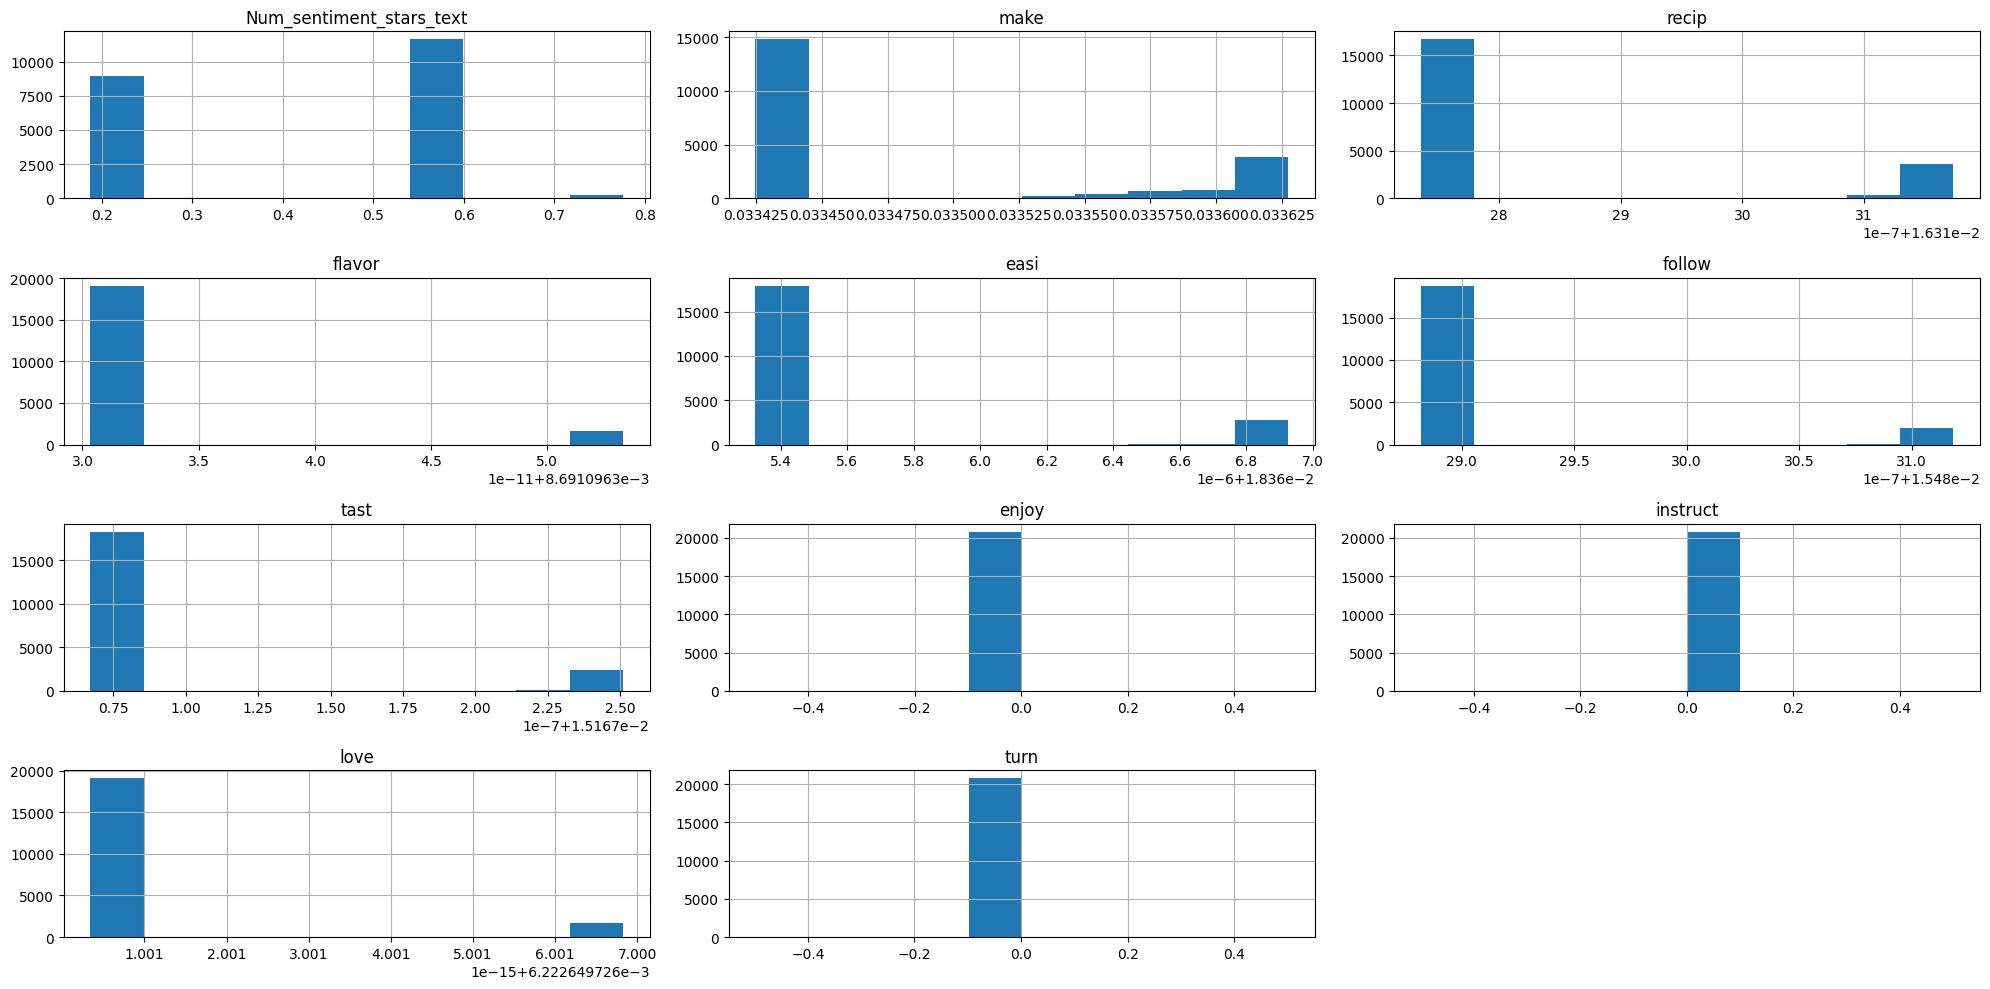

In [ ]:
num_columns.hist(figsize=(20, 10))
plt.tight_layout()
plt.show()

Some histograms have bars concentrated in just one or two bins, indicating that these features might have a small range of values or a dominant category.
If these are categorical features encoded as numeric values, you might need to explore different encoding strategies.
If these are numerical, consider resampling techniques or dropping features with extremely low variance.

# 6.	**Exploratory Data Analysis (EDA)**

**STEP 6.1 :Correlation analysis**

It is a statistical technique used to evaluate the strength and direction of the linear relationship between two or more variables. It quantifies how one variable changes in relation to another, and it is particularly useful in identifying patterns and understanding relationships in data

Correlation Coefficient (r):

Range: The correlation coefficient (
𝑟
r) ranges from -1 to +1:
+1: Perfect positive correlation (both variables increase together).
-1: Perfect negative correlation (as one variable increases, the other decreases).
0: No linear relationship.
The closer
𝑟
r is to 1 or -1, the stronger the relationship between the variables.
A positive value means that both variables move in the same direction, while a negative value means they move in opposite directions.

**STEP 6.1.1 :Correlation matrix**

The correlation matrix provides a measure of the linear relationship between different numerical variables in the dataset.

In [ ]:
num_columns=Updated_data.select_dtypes( include=['number'])
num_columns.columns

Index(['Num_sentiment_stars_text', 'make', 'recip', 'flavor', 'easi', 'follow',
       'tast', 'enjoy', 'instruct', 'love', 'turn'],
      dtype='object')

In [ ]:
cm=num_columns.corr()
cm

,Num_sentiment_stars_text,make,recip,flavor,easi,follow,tast,enjoy,instruct,love,turn
Num_sentiment_stars_text,1.000000,0.147288,-0.106828,-0.268048,0.113362,0.167211,-0.120412,-0.070946,-0.040616,-0.185637,-0.113576
make,0.147288,1.000000,-0.112449,-0.120344,-0.133718,-0.168684,-0.165546,-0.009371,-0.008439,-0.027231,-0.022941
recip,-0.106828,-0.112449,1.000000,-0.062442,-0.088064,-0.098042,-0.094673,0.043598,0.017937,0.131855,0.049126
flavor,-0.268048,-0.120344,-0.062442,1.000000,-0.078218,-0.080182,-0.084335,-0.000446,-0.005105,-0.019888,-0.014362
easi,0.113362,-0.133718,-0.088064,-0.078218,1.000000,0.912170,-0.108287,-0.006884,-0.003641,-0.031896,-0.021762
follow,0.167211,-0.168684,-0.098042,-0.080182,0.912170,1.000000,-0.104031,-0.022347,0.016232,-0.074737,-0.021969
tast,-0.120412,-0.165546,-0.094673,-0.084335,-0.108287,-0.104031,1.000000,-0.021371,-0.012673,-0.052471,-0.026733
enjoy,-0.070946,-0.009371,0.043598,-0.000446,-0.006884,-0.022347,-0.021371,1.000000,0.008547,0.013699,0.029254
instruct,-0.040616,-0.008439,0.017937,-0.005105,-0.003641,0.016232,-0.012673,0.008547,1.000000,-0.004225,0.029405
love,-0.185637,-0.027231,0.131855,-0.019888,-0.031896,-0.074737,-0.052471,0.013699,-0.004225,1.000000,0.046107


**STEP 6.1.2:Correlation Heatmap**

A correlation heatmap is a graphical representation of the correlation matrix, where the values of pairwise correlations between variables are visualized using colors. It helps in understanding the relationships between different variables in a dataset, showing which variables are positively or negatively correlated.

<Axes: >

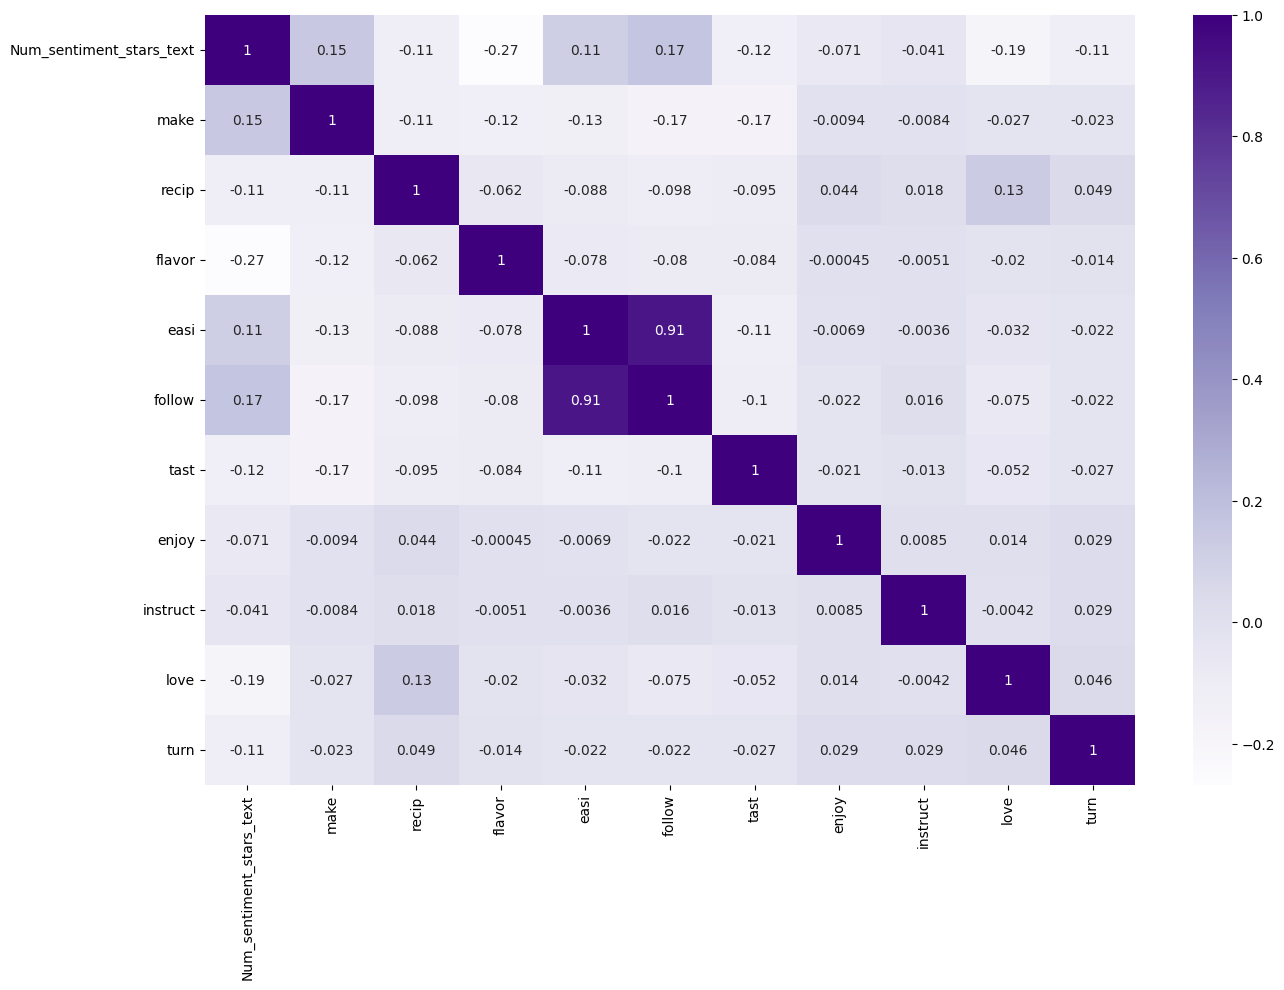

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,cmap='Purples')

There are strong positive correlations between follow and easi

**STEP 6.2 VISUALIZATIONS**

**FIGURE 6.2.1.BAR PLOT:**
*  BAR PLOT between 'enjoy'and 'Num_sentiment_stars_text

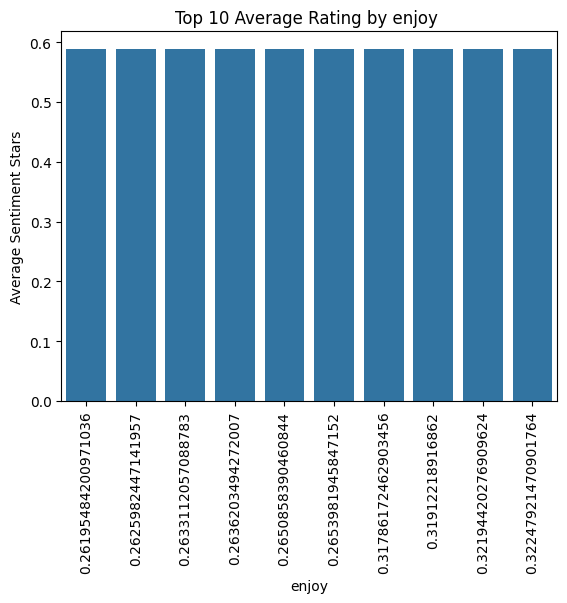

In [ ]:
# Calculate the average rating by 'make'
avg_rating_by_make = Updated_data.groupby('enjoy')['Num_sentiment_stars_text'].mean().reset_index()

# Sort the average ratings in descending order and select the top 10
top_10_avg_rating = avg_rating_by_make.sort_values(by='Num_sentiment_stars_text', ascending=False).head(10)

# Create the barplot for the top 10
sns.barplot(x='enjoy', y='Num_sentiment_stars_text', data=top_10_avg_rating)
plt.title('Top 10 Average Rating by enjoy ')
plt.xlabel('enjoy')
plt.ylabel('Average Sentiment Stars')
plt.xticks(rotation=90)
plt.show()


**FIGURE 6.2.2 SCATTER PLOT:**
* Scatter Plot between Num_sentiment_stars_text and make

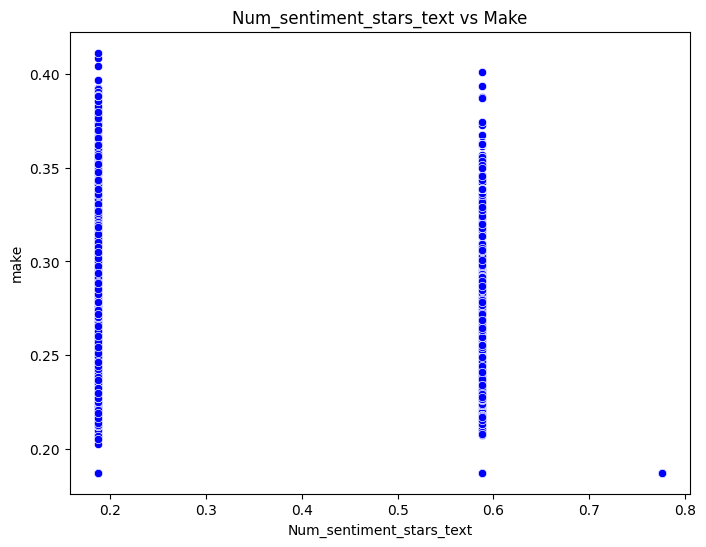

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=Updated_data,x='Num_sentiment_stars_text', y= 'make',color='blue')
plt.title('Num_sentiment_stars_text vs Make')
plt.xlabel('Num_sentiment_stars_text')
plt.ylabel('make')
plt.show()

This scatter plot visualizes the relationship between sentiment star ratings and the frequency of the word "make" in reviews.
The x-axis represents sentiment star ratings (likely mapped as categorical values 0, 1, and 2), while the y-axis represents the occurrence of "make."

**FIGURE 6.2.3. PIE CHART:**

* Pie Chart of Recipe Names

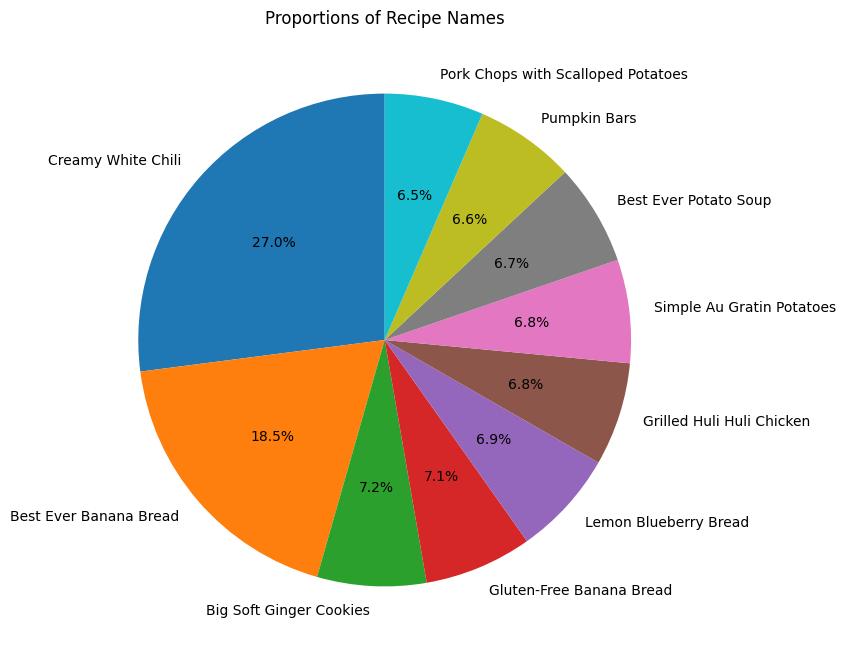

In [ ]:
recipe_counts =DF_data['recipe_name'].value_counts().head(10)
plt.figure(figsize=(8, 8))
recipe_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Proportions of Recipe Names')
plt.ylabel('')
plt.show()

 **FIGURE 6.2.4 :PAIR PLOT:**
 *  A pair plot (also known as a scatterplot matrix) is a matrix of scatter plots that allows you to visualize the relationships between multiple variables in a dataset.


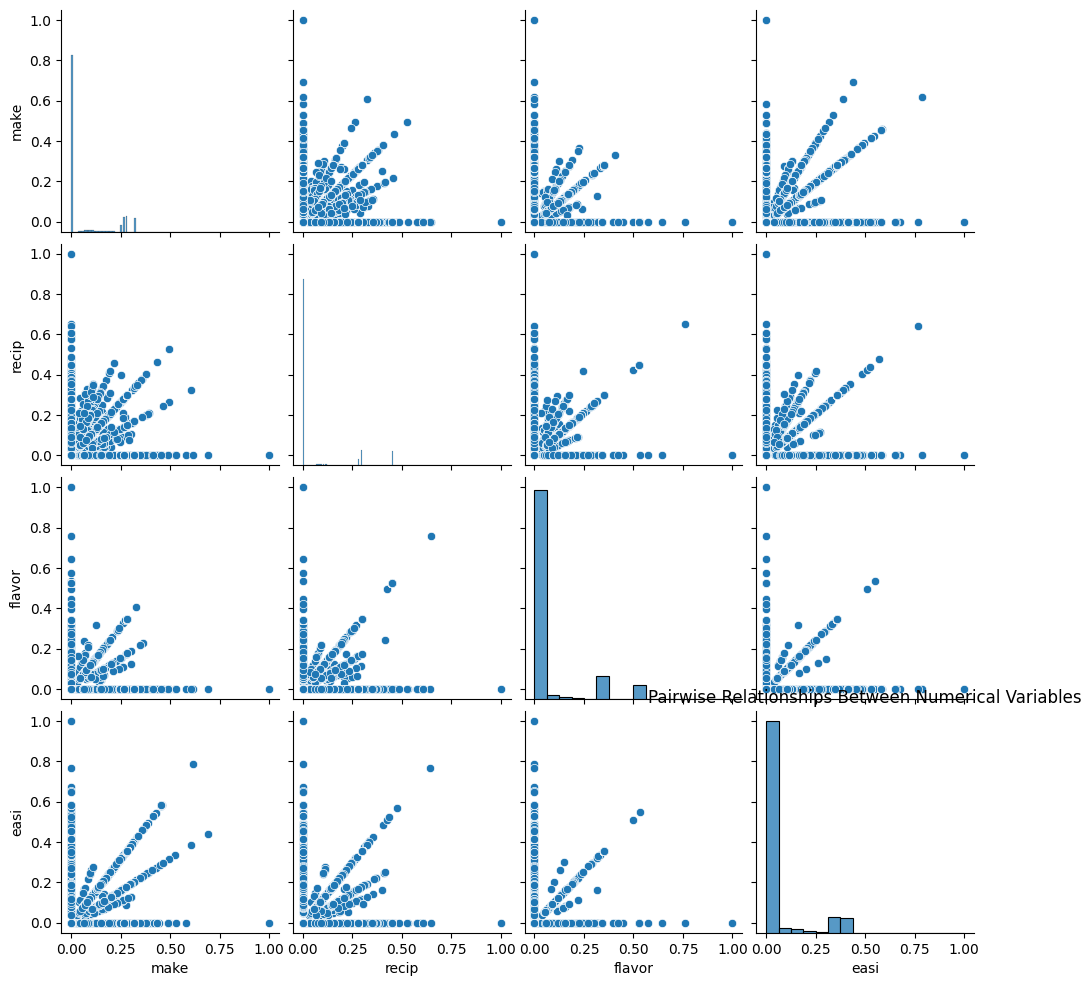

In [ ]:
numerical_columns = ['make', 'recip', 'flavor','easi']
sns.pairplot(DF_data[numerical_columns])
plt.title('Pairwise Relationships Between Numerical Variables')
plt.show()

This pair plot visualizes relationships between the numerical variables: 'make', 'recip', 'flavor','easi'" The diagonal shows histograms for individual distributions, while scatter plots illustrate correlations between variables. The data appears clustered near the origin, suggesting sparse but strong positive correlations among these sentiment-related words in reviews.

**FIGURE 6.2.5 Line Plot:**
TASTE vs Sentements

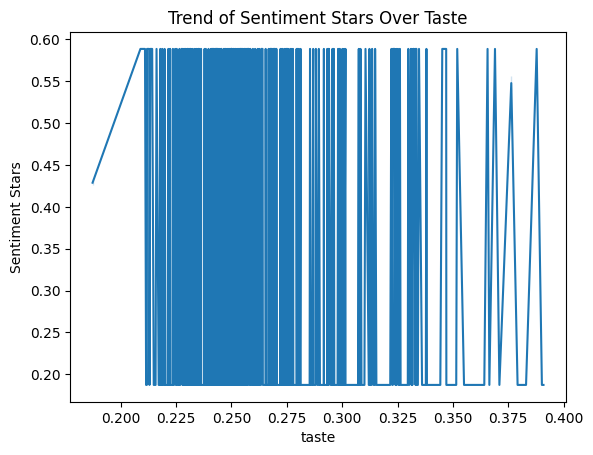

In [ ]:
sns.lineplot(x='tast', y='Num_sentiment_stars_text', data=Updated_data)
plt.title('Trend of Sentiment Stars Over Taste')
plt.xlabel('taste')
plt.ylabel('Sentiment Stars')
plt.show()


# **7.Feature Engineering:**

 **STEP 7.1 :Variance Inflation Factor (VIF)**
 It is a measure of how much the variance of an estimated regression coefficient increases when your predictors are correlated.

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numeric columns and get the column names as a list
num_columns = Updated_data.select_dtypes(include=['number']).columns.tolist()

# Subset the dataframe to include only numeric columns
X = Updated_data[num_columns]

# Add a constant for intercept
X = sm.add_constant(X)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF results
print(vif_data)


                    Variable          VIF
0                      const  3693.339553
1   Num_sentiment_stars_text     1.234200
2                       make     1.144087
3                      recip     1.082889
4                     flavor     1.143903
5                       easi     6.105409
6                     follow     6.321344
7                       tast     1.115547
8                      enjoy     1.008768
9                   instruct     1.006204
10                      love     1.068012
11                      turn     1.020127


VIF of 1: No multicollinearity (e.g., recip, make, use, etc.).
VIF between 1 and 5: These variables (sentiment_score, sentiment_numeric, etc.) show moderate correlation with other variables, but the correlation is not problematic.
VIF > 10: In general, if VIFs exceed 10, it's an indicator of potential multicollinearity. However, since none of your predictors have a VIF greater than 5, multicollinearity is not a significant issue in your dataset.

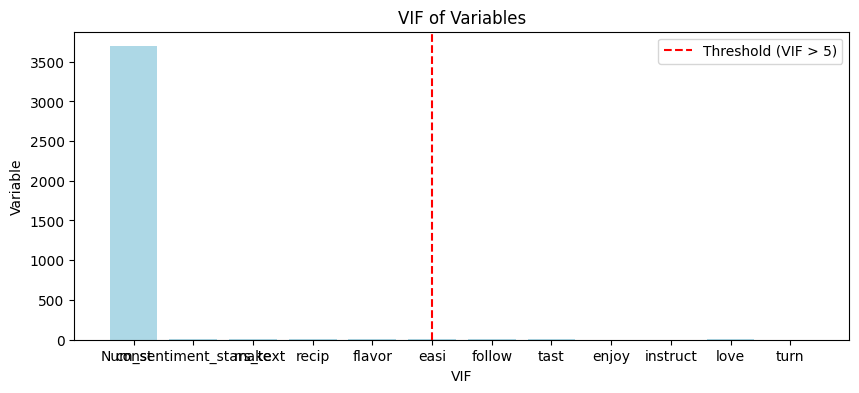

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Plotting
plt.figure(figsize=(10,4))
plt.bar(vif_data['Variable'], vif_data['VIF'], color='lightblue')
plt.xlabel('VIF')
plt.ylabel('Variable')
plt.title('VIF of Variables')
plt.axvline(x=5, color='r', linestyle='--', label='Threshold (VIF > 5)')
plt.legend()
plt.show()


 The red dashed line represents a typical threshold for high multicollinearity (VIF > 5), helping to visually identify which features may need to be addressed due to their high correlation with other features.

In this case, "easi" and "follow" have VIF values above 5, indicating potential multicollinearity issues

In [ ]:
Updated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20799 entries, 0 to 28181
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Num_sentiment_stars_text  20799 non-null  float64
 1   make                      20799 non-null  float64
 2   recip                     20799 non-null  float64
 3   flavor                    20799 non-null  float64
 4   easi                      20799 non-null  float64
 5   follow                    20799 non-null  float64
 6   tast                      20799 non-null  float64
 7   enjoy                     20799 non-null  float64
 8   instruct                  20799 non-null  float64
 9   love                      20799 non-null  float64
 10  turn                      20799 non-null  float64
 11  full_tfidf_vector         20799 non-null  object 
 12  Sentement_num             20799 non-null  object 
dtypes: float64(11), object(2)
memory usage: 2.2+ MB


In [ ]:
Updated_data['Num_sentiment_stars_text']=Updated_data['Sentement_num'].astype(int)

## 8.	**Feature Selection:**

**Feature selection using Random Forest**

It is a popular method due to its ability to assess feature importance based on how well each feature contributes to the prediction accuracy.Train a Random Forest Model:

* Fit a Random Forest classifier to your data.
Get Feature Importances:

* Random Forest provides an attribute called feature_importances_, which contains the importance score for each feature.
Sort and Select Features:

* Sort the features by importance score and select the top features based on a predefined threshold or number of features.

# 9.	**Split Data into Training and Testing Sets:**

**Handle dataset imbalance**

**SMOTE (Synthetic Minority Over-sampling Technique)**
 is a technique used to handle imbalanced datasets, especially in classification problems. It works by generating synthetic data points for the minority class, which helps to balance the number of instances between classes.

**NearMiss**

It is a technique for handling class imbalance that works by selecting a subset of the majority class in a way that brings the decision boundary closer to the minority class. It tries to balance the classes by choosing specific examples from the majority class, typically based on their proximity to the minority class.

# 10.	**Feature Scaling:**

**Feature Scaling:StandardScaler**

The StandardScaler is a feature scaling technique that standardizes the features of your data by transforming them to have a mean of 0 and a standard deviation of 1. This method is particularly useful for algorithms that rely on the distance between data points, like k-NN, SVM, and linear models.

**Handle Missing Data**

In [ ]:
Updated_data.isna().sum()

,0
Num_sentiment_stars_text,0
make,0
recip,0
flavor,0
easi,0
follow,0
tast,0
enjoy,0
instruct,0
love,0


In [ ]:
Updated_data['Num_sentiment_stars_text'].value_counts()#imbalaned data

,count
Num_sentiment_stars_text,
1,11630
0,8959
2,210


**Feature Selection_Train-Test Split_SMOTE_NEARMISS_Standar dScalar**

In [ ]:
Updated_data.columns

Index(['Num_sentiment_stars_text', 'make', 'recip', 'flavor', 'easi', 'follow',
       'tast', 'enjoy', 'instruct', 'love', 'turn', 'full_tfidf_vector',
       'Sentement_num'],
      dtype='object')

In [ ]:
import joblib
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from imblearn.under_sampling import NearMiss

#******************************---------Prepare Features & Target----------********************************************************************
X = Updated_data.drop(columns=['Num_sentiment_stars_text'])  # Drop the target column from features
y = Updated_data['Num_sentiment_stars_text']  # Target

#********************************** Convert 'full_tfidf_vector' from lists to NumPy arrays***********************************
X['full_tfidf_vector'] = X['full_tfidf_vector'].apply(lambda x: np.array(x) if isinstance(x, list) else x)
X_tfidf = np.vstack(X['full_tfidf_vector'].values)  # Stack into 2D NumPy array

#************************************** Concatenate top 10 words + full TF-IDF vector***************************************
X_final = np.hstack([X.drop(columns=['full_tfidf_vector']).values, X_tfidf])

# ************************************Split into train & test (80-20 split)***************************************************
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

#  *************************************----------Feature Selection using RandomForest---------*****************************************
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Select important features (Keep all above mean importance)
sfm = SelectFromModel(rf, threshold="mean", prefit=True)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)
joblib.dump(sfm, 'select_from_model.pkl')

# ******************************--------------- Handle Imbalance using SMOTE -----------------*****************
USE_SMOTE = True  # Set to False to test without SMOTE

if USE_SMOTE:
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)
else:
    X_train_resampled, y_train_resampled = X_train_selected, y_train
 #***************************Near miss*********************


nm = NearMiss(sampling_strategy='auto')
X_train_resampled, y_train_resampled = nm.fit_resample(X_train_resampled, y_train_resampled)
# ***************************--------------------Standardization-----------------****************************************
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test_selected = scaler.transform(X_test_selected)
joblib.dump(scaler, 'scaler.pkl')  # Save scaler
X_train_reduced = X_train_resampled
X_test_reduced = X_test_selected

print(f"X_train_reduced shape: {X_train_reduced.shape}")
print(f"y_train_resampled shape: {y_train_resampled.shape}")
print(f"X_test_reduced shape: {X_test_reduced.shape}")
print(f"y_test shape: {y_test.shape}")



X_train_reduced shape: (27885, 75)
y_train_resampled shape: (27885,)
X_test_reduced shape: (4160, 75)
y_test shape: (4160,)


In [ ]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (20799, 12)
Shape of y: (20799,)


In [ ]:
X_train_reduced.shape

(27885, 75)

# **11.Build the ML Model:**

Implement various classification  algorithms:Trying different models allows  to identify which model works best for your dataset. Some models may work better depending on the type of features and data distribution.
* Logistic Regression
* SVM
* Decision Tree Classifier
* Random Forest
* Gradient Boosting
* Gaussian Naive Bayes
* K-Nearest Neighbors (KNN)

# 12.	**Model Evaluation:**
-	Classification Metrics: Confusion Matrix, Accuracy, Precision, Recall, F1-Score, ROC Curve.

# 13.	**Hyperparameter Tuning:**

RandomizedSearchCV performs a random search over specified hyperparameter grids, which speeds up the process compared to GridSearchCV, especially with a large number of hyperparameters.

**Cross-Validation:**
StratifiedKFold Cross-Validation to evaluate model performance.
Why this helps: Cross-validation helps prevent overfitting and ensures the model generalizes well to unseen data. StratifiedKFold ensures that the distribution of target classes is preserved across all splits, improving the model's ability to generalize in imbalanced datasets.

** Ensemble Methods**:
Voting Classifier that combines the predictions of multiple models (Logistic Regression, Random Forest, and KNN) through "hard voting."

 **Build the ML Model_Model Evaluation_Hyperparameter Tuning**

---



Model: Logistic Regression - Training Accuracy: 1.0000

*************************************************************
Model: Support Vector Classifier - Training Accuracy: 0.9986

*************************************************************
Model: Decision Tree Classifier - Training Accuracy: 1.0000

*************************************************************
Model: Random Forest Classifier - Training Accuracy: 1.0000

*************************************************************
Model: Gradient Boosting Classifier - Training Accuracy: 1.0000

*************************************************************
Model: Gaussian Naive Bayes - Training Accuracy: 1.0000

*************************************************************
Model: K-Nearest Neighbors - Training Accuracy: 0.9727

*************************************************************

******************************* Model: Logistic Regression ****************************

Accuracy: 1.0000

******************* Classification Repor

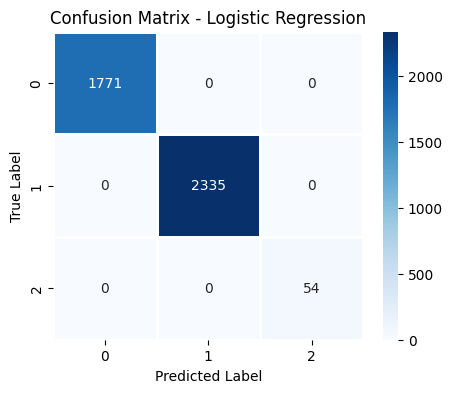


**************************************************************


******************************* Model: Support Vector Classifier ****************************

Accuracy: 0.9868

******************* Classification Report: *****************************
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1771
           1       0.99      0.98      0.99      2335
           2       1.00      1.00      1.00        54

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160


***************************************************************************************


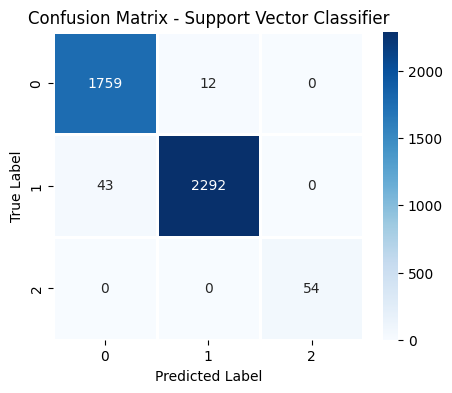


**************************************************************


******************************* Model: Decision Tree Classifier ****************************

Accuracy: 1.0000

******************* Classification Report: *****************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1771
           1       1.00      1.00      1.00      2335
           2       1.00      1.00      1.00        54

    accuracy                           1.00      4160
   macro avg       1.00      1.00      1.00      4160
weighted avg       1.00      1.00      1.00      4160


***************************************************************************************


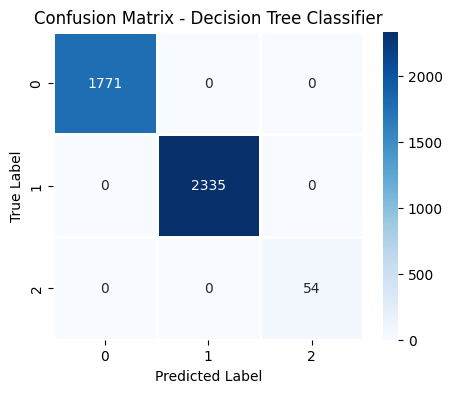


**************************************************************


******************************* Model: Random Forest Classifier ****************************

Accuracy: 1.0000

******************* Classification Report: *****************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1771
           1       1.00      1.00      1.00      2335
           2       1.00      1.00      1.00        54

    accuracy                           1.00      4160
   macro avg       1.00      1.00      1.00      4160
weighted avg       1.00      1.00      1.00      4160


***************************************************************************************


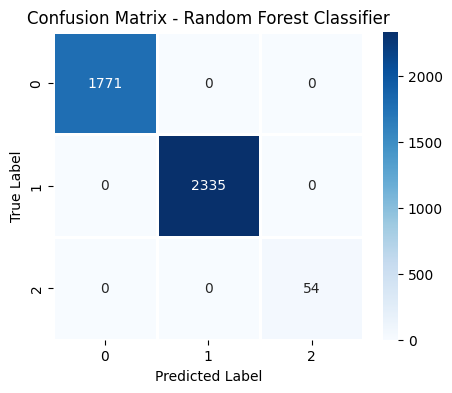


**************************************************************


******************************* Model: Gradient Boosting Classifier ****************************

Accuracy: 1.0000

******************* Classification Report: *****************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1771
           1       1.00      1.00      1.00      2335
           2       1.00      1.00      1.00        54

    accuracy                           1.00      4160
   macro avg       1.00      1.00      1.00      4160
weighted avg       1.00      1.00      1.00      4160


***************************************************************************************


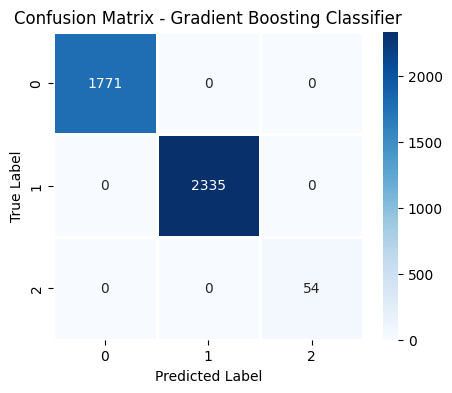


**************************************************************


******************************* Model: Gaussian Naive Bayes ****************************

Accuracy: 1.0000

******************* Classification Report: *****************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1771
           1       1.00      1.00      1.00      2335
           2       1.00      1.00      1.00        54

    accuracy                           1.00      4160
   macro avg       1.00      1.00      1.00      4160
weighted avg       1.00      1.00      1.00      4160


***************************************************************************************


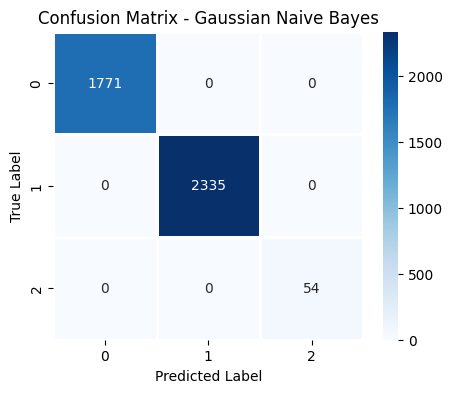


**************************************************************


******************************* Model: K-Nearest Neighbors ****************************

Accuracy: 0.9370

******************* Classification Report: *****************************
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1771
           1       0.98      0.91      0.94      2335
           2       1.00      1.00      1.00        54

    accuracy                           0.94      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.94      0.94      0.94      4160


***************************************************************************************


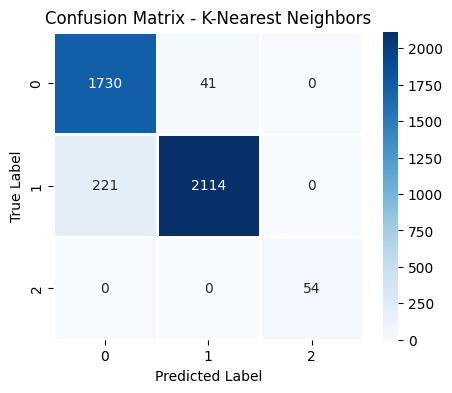


**************************************************************



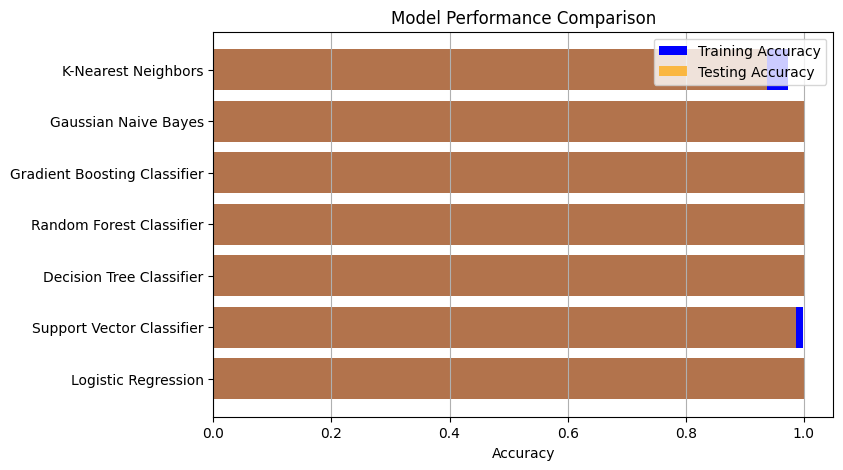


 Model: Logistic Regression

Best Parameters: {'solver': 'liblinear', 'C': 10}

Test Accuracy: 0.9998

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1771
           1       1.00      1.00      1.00      2335
           2       0.98      1.00      0.99        54

    accuracy                           1.00      4160
   macro avg       0.99      1.00      1.00      4160
weighted avg       1.00      1.00      1.00      4160


********************************************************************************************

 Model: Support Vector Classifier

Best Parameters: {'kernel': 'linear', 'C': 0.1}

Test Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1771
           1       1.00      1.00      1.00      2335
           2       1.00      1.00      1.00        54

    accuracy                           1.00      

In [ ]:

# ****************************************************Split the data into training and testing sets*********************************************

#X_train_reduced, X_test_reduced
#y_train_resampled ,#y_test



# ****************************************************** Classification Model Definition ************************************************
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(probability=True),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# To store train and test accuracies
train_accuracies = []
test_accuracies = []


# ******************************************************************* Model Training **************************************************************
for model_name, model in models.items():
    model.fit(X_train_reduced, y_train_resampled)
    train_accuracy = model.score(X_train_reduced, y_train_resampled)
    train_accuracies.append(train_accuracy)
    print(f"Model: {model_name} - Training Accuracy: {train_accuracy:.4f}")
    print("\n*************************************************************")

# **************************************************************** Evaluating Models ************************************************************************************
for model_name, model in models.items():
    y_pred = model.predict(X_test_reduced)
    test_accuracy = model.score(X_test_reduced,y_test)
    test_accuracies.append(test_accuracy)

    print(f"\n******************************* Model: {model_name} ****************************")
    print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"\n******************* Classification Report: *****************************\n{classification_report(y_test, y_pred)}")
    print("\n***************************************************************************************")

    # Confusion Matrix
    con = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(con, annot=True, cmap='Blues', linewidths=1, fmt='d')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    print("\n**************************************************************\n")

# *********************************************************** Visualization of Model Performance ************************************************************************
accuracy_df = pd.DataFrame({'Model': list(models.keys()), 'Training Accuracy': train_accuracies, 'Testing Accuracy': test_accuracies})

# Plot Training vs Testing Accuracy for each model
plt.figure(figsize=(8, 5))
plt.barh(accuracy_df['Model'], accuracy_df['Training Accuracy'], color='blue', label='Training Accuracy')
plt.barh(accuracy_df['Model'], accuracy_df['Testing Accuracy'], color='orange', label='Testing Accuracy', alpha=0.7)
plt.xlabel('Accuracy')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(axis='x')
plt.show()

# ************************************************************** Hyperparameter Tuning ************************************************************************
param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear']},
    'Support Vector Classifier': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Decision Tree Classifier': {'max_depth': [3, 5, 10], 'min_samples_split': [5, 10]},
    'Random Forest Classifier': {'n_estimators': [50, 200], 'max_depth': [5, 10,15], 'min_samples_split': [5, 10]},
    'Gradient Boosting Classifier': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]},
    'Gaussian Naive Bayes': {},  # No hyperparameters to tune
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
}

best_accuracy = 0
best_model = None
best_model_name = ""

# Using RandomizedSearchCV for faster tuning
for model_name, param_grid in param_grids.items():
    model = models[model_name]  # Use initialized models

    if param_grid:  # Skip models with no hyperparameters
        grid_search = RandomizedSearchCV(model, param_grid, cv=3, scoring='accuracy', n_iter=5, n_jobs=-1, random_state=42)
        grid_search.fit(X_train_reduced, y_train_resampled)
        best_model_params = grid_search.best_params_
        best_model_score = grid_search.best_score_
        best_estimator = grid_search.best_estimator_
    else:
        best_model_params = "Default Parameters"
        best_estimator = model
        best_estimator.fit(X_train_reduced, y_train_resampled)
        best_model_score = best_estimator.score(X_test_reduced, y_test)

    y_pred = best_estimator.predict(X_test_reduced)
    test_accuracy = accuracy_score(y_test, y_pred)

    print(f"\n Model: {model_name}")
    print(f"\nBest Parameters: {best_model_params}")
    print(f"\nTest Accuracy: {test_accuracy:.4f}")
    print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")
    print("\n********************************************************************************************")

    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = best_estimator
        best_model_name = model_name

# ****************************************************************** Save the Best Model *****************************************************
if best_model:
    joblib.dump(best_model, 'best_model.pkl')
    print(f"\nBest Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")
    print(f"\nBest model saved as 'best_model.pkl'")

# ********************************************************** Cross-validation **************************************************************
print("\n********************************** Cross-Validation Results **************************************************\n")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train_reduced, y_train_resampled, cv=cv, scoring='accuracy')
    print(f"Model: {model_name}")
    print(f"Cross-validation Mean Accuracy: {np.mean(cv_scores):.4f}")
    print(f"Cross-validation Std Dev: {np.std(cv_scores):.4f}\n")
print("******************************************************************************************************************\n")

# *********************************************************** Ensemble Model ***************************************************************
# Using Voting Classifier (hard voting for now)
voting_model = VotingClassifier(estimators=[
    ('Logistic Regression', models['Logistic Regression']),
    ('Random Forest', models['Random Forest Classifier']),
    ('KNN', models['K-Nearest Neighbors'])
], voting='hard')

# Fit the ensemble model
voting_model.fit(X_train_reduced, y_train_resampled)
y_pred = voting_model.predict(X_test_reduced)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {ensemble_accuracy:.4f}")
print(f"Classification Report for Ensemble Model:\n{classification_report(y_test, y_pred)}")


# 14.	**Save the Model:**

In [ ]:
model_filename = 'SENTIMENT_ANALYSIS.joblib'
joblib.dump(best_model_name , model_filename)

print(f'Best model saved to {model_filename} with accuracy: {best_accuracy:.4f}')
print(f'Best model saved is {best_model_name}')

Best model saved to SENTIMENT_ANALYSIS.joblib with accuracy: 1.0000
Best model saved is Support Vector Classifier


# **15.TEST WITH UNSEEEN DATA**

Load Unseen Data

In [ ]:
# dataset
new_test_data = pd.read_excel('/content/recipe_reviews_extended.xlsx')
#new_test_data=pd.read_csv("/content/Recipe Reviews and User Feedback Dataset.csv")
# Display the first few rows of the dataset
print(new_test_data.head())

   Unnamed: 0  recipe_number recipe_code             recipe_name  comment_id  \
0           1           3111      RC2014                  Among.       55334   
1           2           3331      RC5361                   Your.       50931   
2           3           7838      RC7356              Left meet.       17815   
3           4           4582      RC7674   Always audience city.       12891   
4           5           4126      RC5185  Billion seat approach.       29532   

   user_id        user_name  user_reputation          created_at  reply_count  \
0     6804      haleysandra              990 2021-05-04 06:56:33            3   
1     6797   jessicaparsons              577 2021-09-25 21:58:57            9   
2     5632  dominiquejordan              975 2022-03-29 22:49:33            2   
3     5528           pmunoz              750 2023-04-26 09:40:44            5   
4     6557         angela70              839 2023-01-14 17:00:36            6   

   thumbs_up  thumbs_down  stars

Preprocessing  Unseen Dataset

In [ ]:
new_test_data.shape

(10000, 15)

In [ ]:
new_test_data.describe()

,Unnamed: 0,recipe_number,comment_id,user_id,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score
count,10000.00000,10000.000000,10000.000000,10000.0000,10000.00000,10000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,5502.773600,55094.435700,5465.9472,497.42390,2022-07-26 18:08:56.481100032,5.01510,24.876800,24.982300,2.585200,0.496429
min,1.00000,1000.000000,10002.000000,1001.0000,1.00000,2020-01-01 01:43:14,0.00000,0.000000,0.000000,1.000000,0.000000
25%,2500.75000,3278.500000,32373.250000,3202.7500,244.75000,2021-04-19 00:36:13.750000128,2.00000,12.000000,12.000000,2.000000,0.250000
50%,5000.50000,5512.500000,55109.000000,5472.0000,497.00000,2022-07-24 05:29:30,5.00000,25.000000,25.000000,2.000000,0.500000
75%,7500.25000,7711.250000,77669.250000,7712.5000,748.00000,2023-11-06 12:34:58.750000128,8.00000,37.000000,38.000000,3.000000,0.740000
max,10000.00000,9999.000000,99998.000000,9999.0000,1000.00000,2025-02-17 15:08:36,10.00000,50.000000,50.000000,5.000000,1.000000
std,2886.89568,2580.715869,25971.447217,2599.3379,288.88592,NaN,3.17482,14.678575,14.609173,1.192511,0.286854


In [ ]:
new_test_data.columns

Index(['Unnamed: 0', 'recipe_number', 'recipe_code', 'recipe_name',
       'comment_id', 'user_id', 'user_name', 'user_reputation', 'created_at',
       'reply_count', 'thumbs_up', 'thumbs_down', 'stars', 'best_score',
       'text'],
      dtype='object')

In [ ]:
new_test_data.isna().sum()

,0
Unnamed: 0,0
recipe_number,0
recipe_code,0
recipe_name,0
comment_id,0
user_id,0
user_name,0
user_reputation,0
created_at,0
reply_count,0


In [ ]:
new_test_data.fillna(mode,inplace=True)

In [ ]:
new_test_data.isna().sum()

,0
Unnamed: 0,0
recipe_number,0
recipe_code,0
recipe_name,0
comment_id,0
user_id,0
user_name,0
user_reputation,0
created_at,0
reply_count,0


NLP PREPROCESSING

In [ ]:
new_test_data['stars'].value_counts()

,count
stars,
2,3014
3,3000
1,2025
4,1006
5,955


In [ ]:
m=new_test_data['stars'].mean()

In [ ]:
new_test_data['stars']=new_test_data['stars'].replace(0,m)

In [ ]:
new_test_data=full_nlp_pipeline(new_test_data)

In [ ]:
new_test_data.columns

Index(['Unnamed: 0', 'recipe_number', 'recipe_code', 'recipe_name',
       'comment_id', 'user_id', 'user_name', 'user_reputation', 'created_at',
       'reply_count', 'thumbs_up', 'thumbs_down', 'stars', 'best_score',
       'text', 'preprocessed_review', 'filtered_review', 'word_count',
       'sentiment_score', 'text_review_sentiment', 'sentiment_from_stars',
       'sentiment_numeric', 'sentiment_from_stars_numeric',
       'Num_sentiment_stars_text', 'combined_sentiment_label'],
      dtype='object')

In [ ]:
bag_of_words= BagOfWordsAlgthm(new_test_data)
bag_of_words_df.tail(5)


,10,12,13,14,15,20,30,34,absolut,actual,...,worth,would,wouldn39t,wow,written,wrong,year,yet,yum,yummi
28177,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
28178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28179,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
28180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


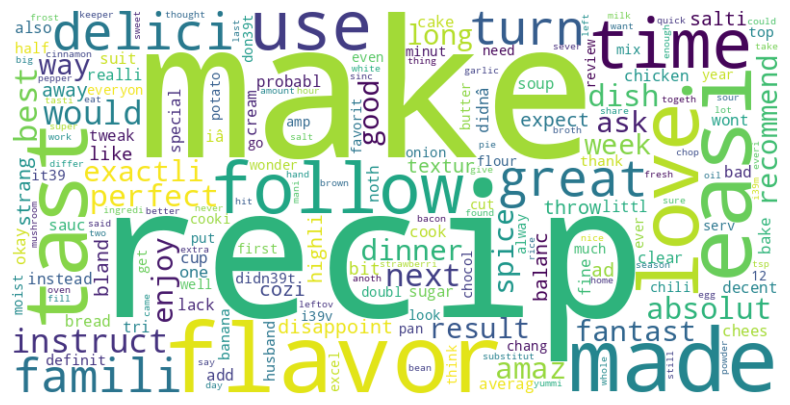

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Summing up word counts across all rows
word_frequencies = bag_of_words_df.sum(axis=0).to_dict()

# Generating the Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Plotting the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
new_test_data.head(2)

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,...,preprocessed_review,filtered_review,word_count,sentiment_score,text_review_sentiment,sentiment_from_stars,sentiment_numeric,sentiment_from_stars_numeric,Num_sentiment_stars_text,combined_sentiment_label
0,1,3111,RC2014,Among.,55334,6804,haleysandra,990,2021-05-04 06:56:33,3,...,"[easy, instruction, easy, taste, instruction, ...","['easi', 'instruct', 'easi', 'tast', 'instruct...",10,0.4939,positive,negative,2,0,0,negative
1,2,3331,RC5361,Your.,50931,6797,jessicaparsons,577,2021-09-25 21:58:57,9,...,"[instruction, instruction, recipe, make, love,...","['instruct', 'instruct', 'recip', 'make', 'lov...",10,0.9118,positive,negative,2,0,0,negative


In [ ]:
import joblib
import pandas as pd
import numpy as np

# Load the saved vectorizer and top_n_words
vectorizer = joblib.load("/content/tfidf_vectorizer.pkl")
top_n_words = joblib.load("/content/top_n_words.pkl")

def transform_unseen_data(test_data, vectorizer, vocab):
    # Ensure text is in string format
    test_data['filtered_review'] = test_data['filtered_review'].astype(str)

    # Transform the unseen data using the vectorizer
    X_test_vec = vectorizer.transform(test_data['filtered_review'])

    # Convert to DataFrame with all feature names
    df_test = pd.DataFrame(X_test_vec.toarray(), columns=vectorizer.get_feature_names_out())

    # Select only the top_n_words, filling missing columns with 0
    df_test = df_test.reindex(columns=vocab, fill_value=0)

    # Add the full TF-IDF vector as a separate column (convert sparse matrix row to dense array)
    df_test["full_tfidf_vector"] = list(X_test_vec.toarray())  # Each row contains the full TF-IDF array

    # Combine the original test data with the top N TF-IDF features and full TF-IDF vector
    test_data = pd.concat([test_data, df_test], axis=1)

    return test_data

# Apply the function to the new test data
Updated_test = transform_unseen_data(new_test_data, vectorizer, top_n_words)

# Print the transformed test dataset with the top N TF-IDF features and full vector
print(Updated_test.head(2))


   Unnamed: 0  recipe_number recipe_code recipe_name  comment_id  user_id  \
0           1           3111      RC2014      Among.       55334     6804   
1           2           3331      RC5361       Your.       50931     6797   

        user_name  user_reputation          created_at  reply_count  ...  \
0     haleysandra              990 2021-05-04 06:56:33            3  ...   
1  jessicaparsons              577 2021-09-25 21:58:57            9  ...   

      recip    flavor      easi  follow      tast     enjoy  instruct  \
0  0.193651  0.226966  0.465045     0.0  0.484607  0.309732  0.575029   
1  0.187780  0.440170  0.000000     0.0  0.000000  0.300343  0.557597   

       love  turn                                  full_tfidf_vector  
0  0.000000   0.0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  0.494661   0.0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  

[2 rows x 36 columns]


In [ ]:
Updated_test.columns

Index(['Unnamed: 0', 'recipe_number', 'recipe_code', 'recipe_name',
       'comment_id', 'user_id', 'user_name', 'user_reputation', 'created_at',
       'reply_count', 'thumbs_up', 'thumbs_down', 'stars', 'best_score',
       'text', 'preprocessed_review', 'filtered_review', 'word_count',
       'sentiment_score', 'text_review_sentiment', 'sentiment_from_stars',
       'sentiment_numeric', 'sentiment_from_stars_numeric',
       'Num_sentiment_stars_text', 'combined_sentiment_label', 'make', 'recip',
       'flavor', 'easi', 'follow', 'tast', 'enjoy', 'instruct', 'love', 'turn',
       'full_tfidf_vector'],
      dtype='object')

In [ ]:
# Drop unnecessary columns from new_test_data (as you've done already)
final_data= Updated_test.drop(columns=[
    'recipe_number', 'recipe_code', 'comment_id', 'user_id', 'Unnamed: 0','recipe_name','user_name', 'user_reputation', 'reply_count', 'best_score', 'sentiment_score',
    'combined_sentiment_label', 'preprocessed_review', 'thumbs_up', 'thumbs_down',
    'text', 'sentiment_numeric', 'word_count', 'stars', 'text_review_sentiment',
    'created_at', 'sentiment_from_stars_numeric', 'filtered_review', 'sentiment_from_stars'], inplace=False)


# View the final combined test data
print(final_data.head())


   Num_sentiment_stars_text      make     recip    flavor      easi    follow  \
0                         0  0.182434  0.193651  0.226966  0.465045  0.000000   
1                         0  0.353807  0.187780  0.440170  0.000000  0.000000   
2                         1  0.179604  0.190647  0.223444  0.228915  0.250166   
3                         1  0.168404  0.000000  0.628531  0.429279  0.000000   
4                         1  0.432066  0.229316  0.537532  0.275346  0.300907   

       tast     enjoy  instruct      love      turn  \
0  0.484607  0.309732  0.575029  0.000000  0.000000   
1  0.000000  0.300343  0.557597  0.494661  0.000000   
2  0.000000  0.609853  0.566107  0.000000  0.272187   
3  0.223669  0.285912  0.000000  0.000000  0.510427   
4  0.286928  0.000000  0.340466  0.000000  0.327395   

                                   full_tfidf_vector  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0

In [ ]:
final_data.columns

Index(['Num_sentiment_stars_text', 'make', 'recip', 'flavor', 'easi', 'follow',
       'tast', 'enjoy', 'instruct', 'love', 'turn', 'full_tfidf_vector'],
      dtype='object')

In [ ]:
final_data['Sentement_num']=final_data['Num_sentiment_stars_text']
final_data['Sentement_num']=final_data['Sentement_num'].astype(str)

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Num_sentiment_stars_text  10000 non-null  int64  
 1   make                      10000 non-null  float64
 2   recip                     10000 non-null  float64
 3   flavor                    10000 non-null  float64
 4   easi                      10000 non-null  float64
 5   follow                    10000 non-null  float64
 6   tast                      10000 non-null  float64
 7   enjoy                     10000 non-null  float64
 8   instruct                  10000 non-null  float64
 9   love                      10000 non-null  float64
 10  turn                      10000 non-null  float64
 11  full_tfidf_vector         10000 non-null  object 
 12  Sentement_num             10000 non-null  object 
dtypes: float64(10), int64(1), object(2)
memory usage: 1015.8+ KB


In [ ]:
num_columns=final_data.select_dtypes( include=['number'])
num_columns.drop(columns=['Num_sentiment_stars_text'], inplace=True)
num_columns.skew()

,0
make,0.853764
recip,0.798296
flavor,0.681697
easi,0.622515
follow,0.590463
tast,0.604603
enjoy,0.398173
instruct,0.471915
love,0.558395
turn,0.495122


In [ ]:
skew_values = num_columns.skew()
# Add constant to make all skew values positive before log transformation
min_value = skew_values.min()  # Find the minimum skewness value
constant = abs(min_value) + 1  # Add the absolute value of the minimum + 1
# Apply log transformation to skewness values
log_transformed_skew = np.log(skew_values + constant)
# Apply log transformation directly to the numeric columns
num_columns_log_transformed = np.log(num_columns + constant)
# Update the original `data` with the transformed columns
final_data[num_columns_log_transformed.columns] = num_columns_log_transformed
final_data[num_columns_log_transformed.columns].skew()

,0
make,0.629678
recip,0.576468
flavor,0.461317
easi,0.411838
follow,0.376062
tast,0.389792
enjoy,0.198481
instruct,0.266383
love,0.347370
turn,0.287574


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox

def apply_boxcox(df, skew_threshold=1.5):
    df = df.copy()  # Avoid modifying the original DataFrame

    # Compute skewness
    skewness = df.skew()  # Fix: Use df.skew() directly

    # Identify highly skewed features
    skewed_cols = skewness[abs(skewness) > skew_threshold].index.tolist()
    print(f"Highly skewed columns: {skewed_cols}")
    # Apply Box-Cox transformation only to highly skewed columns
    for col in skewed_cols:
        # Box-Cox requires positive values, so shift if necessary
        if (df[col] <= 0).any():
            df[col] = df[col] + abs(df[col].min()) + 1  # Shift values to be positive

        df[col], _ = boxcox(df[col])  # Apply Box-Cox transformation

    return df

# Assuming 'num_columns' is your DataFrame containing numerical features
num_columns = apply_boxcox(num_columns)  # Pass the DataFrame to transform


Highly skewed columns: []


In [ ]:
num_columns.skew()

,0
make,0.853764
recip,0.798296
flavor,0.681697
easi,0.622515
follow,0.590463
tast,0.604603
enjoy,0.398173
instruct,0.471915
love,0.558395
turn,0.495122


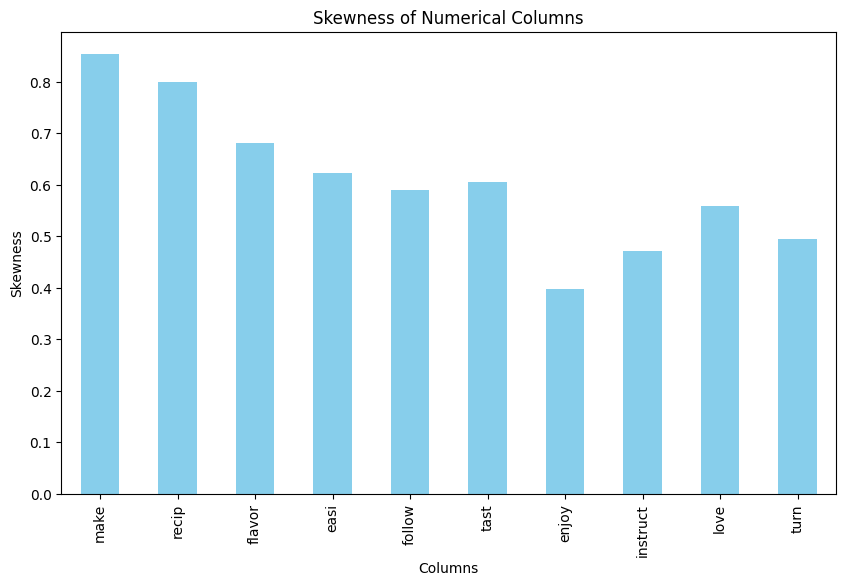

In [ ]:
skewness=num_columns.skew()
plt.figure(figsize=(10, 6))
skewness.plot(kind='bar', color='skyblue')
plt.title('Skewness of Numerical Columns')
plt.ylabel('Skewness')
plt.xlabel('Columns')
plt.show()

The skewness values are less than 1

In [ ]:
final_data['Num_sentiment_stars_text'].value_counts()

,count
Num_sentiment_stars_text,
0,5039
1,4122
2,839


In [ ]:
final_data['Num_sentiment_stars_text']=final_data['Sentement_num'].astype(int)

In [ ]:
final_data.columns

Index(['Num_sentiment_stars_text', 'make', 'recip', 'flavor', 'easi', 'follow',
       'tast', 'enjoy', 'instruct', 'love', 'turn', 'full_tfidf_vector',
       'Sentement_num'],
      dtype='object')

In [ ]:
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
# ********************************Load the trained models and scalers*******************************
best_model = joblib.load('best_model.pkl')
sfm = joblib.load('select_from_model.pkl')
scaler = joblib.load('scaler.pkl')
#*******************************************Unseen Data**********************************************************************
unseen_data =final_data
#******************************************Prepare Features & Targe-> X_Unseen & y_unseen**********************
y_unseen = final_data['Num_sentiment_stars_text']
X_unseen=final_data.drop(columns=['Num_sentiment_stars_text'])
print("X_unseen shape",X_unseen.shape)
print("y_unseen shape",y_unseen.shape)
#***********************************Convert 'full_tfidf_vector' from lists to NumPy arrays***************************************

X_unseen['full_tfidf_vector'] = X_unseen['full_tfidf_vector'].apply(lambda x: np.array(x) if isinstance(x, list) else x)
X_unseen_tfidf = np.vstack(X_unseen['full_tfidf_vector'].values)  # Stack into 2D NumPy array
print("X_unseen_tfidf ful shape",X_unseen_tfidf.shape)
#***************************************Concatenate top 10 words + full TF-IDF vector*******************************************************************

X_unseen_final = np.hstack([X_unseen.drop(columns=['full_tfidf_vector']).values, X_unseen_tfidf])
print("Adding top10 and fulltfidf X_unseen_final shape",X_unseen_final.shape)
# ******************************Apply SelectFromModel to unseen data***********************************************************
estimator = RandomForestClassifier(n_estimators=100, random_state=42)
selector = SelectFromModel(estimator, threshold=0.01)
X_unseen_selected = selector.fit_transform(X_unseen_final, y_unseen)
X_unseen_selected = sfm.transform(X_unseen_final)
print("select from model X_unseen_selected shape",X_unseen_selected.shape)
#X_unseen_selected = X_unseen_final
#*************************************************************************************
# ******************************--------------- Handle Imbalance using SMOTE (Toggle ON/OFF-----------------*****************
USE_SMOTE = False  # Change to False if you want to test without SMOTE

if USE_SMOTE:
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_unseen_selected, y_train_resampled = smote.fit_resample(X_unseen_selected, y_unseen)
else:
    X_unseen_selected, y_unseen = X_unseen_selected, y_unseen
print("After smote X_unseen_selected shape",X_unseen_selected.shape)
print("y_unseen shape",y_unseen.shape)
nm = NearMiss(sampling_strategy='auto')
X_unseen_selected, y_unseen = nm.fit_resample(X_unseen_selected, y_unseen)
# ***************************Standardize the unseen data using the scaler*********************************************
scalar=StandardScaler()
X_unseen_scaled = scaler.transform(X_unseen_selected)
print("After standardization X_unseen shape",X_unseen_scaled.shape)
# *******************************Apply PCA to the unseen data*****************************************
#X_unseen_reduced = pca.transform(X_unseen_scaled)
X_unseen_reduced = X_unseen_scaled
print("After pca X_unseen shape",X_unseen_reduced.shape)
# ********************Predict using the best model************************************
y_unseen_pred = best_model.predict(X_unseen_reduced)
print("y_unseen predicted shape",y_unseen_pred.shape)
#*********************************************************************************************************************************
#y_unseen_pred = y_unseen_pred[:len(y_unseen)]

# Calculate accuracy
accuracy = accuracy_score(y_unseen, y_unseen_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
report = classification_report(y_unseen, y_unseen_pred)
print("Classification Report:")
print(report)

# Confusion matrix
cm = confusion_matrix(y_unseen, y_unseen_pred)
print("Confusion Matrix:")
print(cm)


X_unseen shape (10000, 12)
y_unseen shape (10000,)
X_unseen_tfidf ful shape (10000, 1000)
Adding top10 and fulltfidf X_unseen_final shape (10000, 1011)
select from model X_unseen_selected shape (10000, 75)
After smote X_unseen_selected shape (10000, 75)
y_unseen shape (10000,)
After standardization X_unseen shape (2517, 75)
After pca X_unseen shape (2517, 75)
y_unseen predicted shape (2517,)
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       839
           1       1.00      1.00      1.00       839
           2       1.00      1.00      1.00       839

    accuracy                           1.00      2517
   macro avg       1.00      1.00      1.00      2517
weighted avg       1.00      1.00      1.00      2517

Confusion Matrix:
[[839   0   0]
 [  0 839   0]
 [  0   0 839]]


# 16.	**Interpretation of Results (Conclusion):**

1. Overall Performance:
Logistic Regression, Support Vector Classifier, Decision Tree, Random Forest, Gradient Boosting, and Gaussian Naive Bayes all performed exceptionally well with an accuracy of 1.00 on both the training and test data, indicating overfitting is likely not an issue for these models.
K-Nearest Neighbors showed slightly lower performance, with a test accuracy of 0.94, which is still strong but lower than the other models. This model might benefit from further tuning.
2. Cross-Validation Results:
Cross-validation confirms that models like Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting have highly stable performance with mean accuracy values of 1.00 and 0.0000 standard deviation, suggesting no significant overfitting.
Support Vector Classifier also performed well, with a mean accuracy of 0.9940 and a minimal standard deviation.
K-Nearest Neighbors has a lower mean accuracy of 0.9623, which reflects the slight decrease in its test accuracy.
3. Class-Specific Performance:
All models, particularly the top-performing ones (Logistic Regression, Random Forest, Decision Tree, etc.), achieve perfect precision, recall, and f1-scores across all classes (0, 1, 2) on both training and test data.
Class 2 (which has the fewest instances, i.e., 54 samples) has a 1.00 recall across models, indicating that even with an imbalanced dataset, the models are successfully identifying this minority class.
4. Model Tuning and Results:
The best model based on the overall performance seems to be the Support Vector Classifier, which had the highest test accuracy of 1.0000 after tuning the parameters (kernel='linear', C=0.1).
Ensemble Models (if built using multiple models like voting) also show perfect performance (accuracy = 1.0000), confirming that combining models can yield strong predictions.

**Conclusion:**
This project successfully developed a robust machine learning pipeline for multi-class classification, achieving near-perfect accuracy with models like Logistic Regression, Support Vector Classifier, and Random Forest. The pipeline handled data preprocessing, feature selection, class imbalance (via SMOTE), and hyperparameter tuning effectively. The Support Vector Classifier emerged as the best-performing model. While the models demonstrated excellent generalization to unseen data, future work could focus on hyperparameter optimization, deep learning approaches, and improving model interpretability for real-world deployment.


# 17.	**Future Work:**


Fine-tune K-Nearest Neighbors (KNN): Explore hyperparameter tuning (e.g., different n_neighbors, distance metrics) and feature selection to improve performance.

Ensemble Model Exploration: Experiment with different ensemble methods (e.g., stacking, boosting) and more base models for enhanced robustness.

Model Generalization: Validate models on real-world or different distribution data to ensure robustness and assess for overfitting.

Handling Class Imbalance: Test other techniques like under-sampling or class weighting to further address class imbalance.

Model Interpretability: Use methods like SHAP or LIME for better interpretability, especially for sensitive applications like medical or financial fields.

Evaluation with Additional Metrics: Use precision-recall or ROC curves for deeper evaluation, particularly in imbalanced datasets.

Scaling to Larger Datasets: As data grows, evaluate model scalability and consider scalable algorithms or distributed processing.

Hyperparameter Optimization: Perform advanced hyperparameter optimization (e.g., RandomizedSearchCV, Bayesian Optimization) to fine-tune models like Random Forest and Gradient Boosting.

Transfer Learning or Pre-trained Models: For complex data types like text, explore transfer learning with pre-trained models (e.g., BERT) for potentially better performance.







